# Gradient Descent and Optimization: The Engine of Modern Machine Learning

## Welcome to Today's Journey into Optimization

*"In machine learning, we don't program computers to solve problems directly. Instead, we program them to learn how to solve problems by finding the best parameters. Optimization is the engine that powers this learning process."*


## Today's Agenda

1. **Introduction & Setup** (5 min)
   - Why optimization matters in modern ML
   - Setting up our interactive environment

2. **Data Exploration** (10 min)
   - Understanding the California Housing dataset
   - Identifying patterns for optimization

3. **Building Intuition** (15 min)
   - Interactive "Best Line" game
   - Visualizing the loss landscape

4. **Manual Gradient Descent** (15 min)
   - Mathematical foundations
   - Building from scratch

5. **Stochastic Variants** (10 min)
   - Scaling to large datasets
   - Batch vs. mini-batch trade-offs

6. **Modern Optimizers** (15 min)
   - From momentum to Adam
   - Why different optimizers matter

7. **Neural Network Optimization** (10 min)
   - Real-world application with PyTorch
   - Learning rate scheduling

8. **Debugging & Best Practices** (10 min)
   - Common pitfalls and solutions
   - Professional debugging techniques

9. **Conclusions & Future Directions** (5 min)

## Learning Outcomes

By the end of this lecture, you will be able to:

### **Conceptual Understanding**
- Explain how gradient descent finds optimal parameters
- Visualize and interpret loss landscapes
- Compare different optimization algorithms

### **Practical Skills**
- Implement gradient descent from scratch
- Use modern optimizers effectively
- Debug optimization problems

### **Professional Competencies**
- Track experiments with Weights & Biases
- Choose appropriate optimizers for different problems
- Apply best practices in production ML systems

### **Critical Thinking**
- Understand why optimization is central to modern AI
- Recognize trade-offs in optimizer selection
- Connect optimization to broader ML concepts

## Why Optimization Matters in Modern ML

### The Foundation of Learning

Modern machine learning has revolutionized how we solve problems. Instead of hand-crafting rules, we define:
1. **A model architecture** (the function family)
2. **A loss function** (what we want to minimize)
3. **An optimization algorithm** (how to find the best parameters)

### Real-World Impact

- **GPT Models**: Billions of parameters optimized using advanced techniques
- **Computer Vision**: From simple edge detection to understanding scenes
- **Recommendation Systems**: Personalizing content for billions of users
- **Scientific Discovery**: Finding patterns in complex data

Today, we'll build these optimization algorithms from the ground up!

## Part 1: Setting Up Our Interactive Environment

Let's begin by setting up our Google Colab environment with all necessary tools for our optimization journey.
 
### Installing and Importing Required Libraries

First, we'll install Weights & Biases for experiment tracking. This tool is essential in modern ML workflows for monitoring optimization progress.


In [1]:
# Install required packages for Google Colab
!pip install -q wandb


# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.patches import FancyBboxPatch
import seaborn as sns
from IPython.display import HTML

# Machine learning
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# PyTorch for neural networks
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Utilities
import time
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

print("✅ All libraries loaded successfully!")
print(f"PyTorch version: {torch.__version__}")

✅ All libraries loaded successfully!
PyTorch version: 2.7.1


### Setting Up Interactive Widgets

We'll use ipywidgets for interactive demonstrations throughout this notebook.

In [2]:
# Import interactive components
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

# Configure matplotlib for better display
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline  # Use inline backend for RISE compatibility
%config InlineBackend.figure_format = 'retina'

# For animations in notebook
from matplotlib import rc
rc('animation', html='jshtml')

print("✅ Visualization system ready!")

UsageError: unrecognized arguments: # Use inline backend for RISE compatibility


### Creating Our Visual Design System

Consistency in visualization helps learning. We'll establish a color palette and styling system used throughout the notebook.


In [3]:
# Color palette for consistent styling
COLORS = {
    'primary': '#3498db',    # Calm blue
    'secondary': '#e74c3c',  # Attention red
    'success': '#2ecc71',    # Success green
    'warning': '#f39c12',    # Warning orange
    'info': '#9b59b6',       # Info purple
    'dark': '#34495e'        # Dark gray
}

def style_plot(ax, title="", xlabel="", ylabel=""):
    """Apply consistent styling to plots"""
    ax.set_title(title, fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

def create_gradient_colormap():
    """Create a custom colormap for gradient visualization"""
    from matplotlib.colors import LinearSegmentedColormap
    colors = ['#3498db', '#9b59b6', '#e74c3c', '#f39c12']
    n_bins = 100
    cmap = LinearSegmentedColormap.from_list('gradient', colors, N=n_bins)
    return cmap

print("🎨 Visual design system ready!")

🎨 Visual design system ready!


### Initializing Weights & Biases (Optional)

Weights & Biases (WandB) is the industry standard for ML experiment tracking. For this notebook, it's optional but recommended.


In [4]:
# Optional: Initialize WandB for experiment tracking
try:
    import wandb
    # You can login with your API key or use offline mode
    wandb.login()
    USE_WANDB = True
    print("🎯 WandB initialized successfully!")
except:
    print("⚠️ WandB not available. Continuing without experiment tracking.")
    USE_WANDB = False
    
    # Create a dummy wandb object for compatibility
    class DummyWandB:
        def init(self, *args, **kwargs):
            pass
        def log(self, *args, **kwargs):
            pass
        def finish(self):
            pass
    
    wandb = DummyWandB()

⚠️ WandB not available. Continuing without experiment tracking.


## Part 2: Understanding Our Data - California Housing

Before diving into optimization, we need to understand what we're optimizing. The California Housing dataset is perfect for demonstrating optimization concepts because:

1. **Real-world relevance**: Actual housing prices from California
2. **Clear relationships**: Income strongly correlates with house prices
3. **Moderate size**: Large enough to be interesting, small enough to be fast
4. **Continuous target**: Ideal for regression and gradient-based optimization

### Loading and Exploring the Dataset

Let's load the California Housing dataset and understand its structure.

In [5]:
# Load the California Housing dataset
housing = fetch_california_housing()
X_full, y_full = housing.data, housing.target

# Create a DataFrame for easier manipulation
feature_names = housing.feature_names
df = pd.DataFrame(X_full, columns=feature_names)
df['target'] = y_full

print("📊 Dataset Overview:")
print(f"Number of samples: {len(df):,}")
print(f"Number of features: {len(feature_names)}")
print(f"\nFeatures: {', '.join(feature_names)}")
print(f"\nTarget: Median house value in hundreds of thousands of dollars")

📊 Dataset Overview:
Number of samples: 20,640
Number of features: 8

Features: MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude

Target: Median house value in hundreds of thousands of dollars


In [6]:
# Display statistical summary
print("\n📈 Statistical Summary:")
df.describe().round(2)


📈 Statistical Summary:


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
count  20640.00  20640.00  20640.00   20640.00    20640.00  20640.00   
mean       3.87     28.64      5.43       1.10     1425.48      3.07   
std        1.90     12.59      2.47       0.47     1132.46     10.39   
min        0.50      1.00      0.85       0.33        3.00      0.69   
25%        2.56     18.00      4.44       1.01      787.00      2.43   
50%        3.53     29.00      5.23       1.05     1166.00      2.82   
75%        4.74     37.00      6.05       1.10     1725.00      3.28   
max       15.00     52.00    141.91      34.07    35682.00   1243.33   

       Latitude  Longitude    target  
count  20640.00   20640.00  20640.00  
mean      35.63    -119.57      2.07  
std        2.14       2.00      1.15  
min       32.54    -124.35      0.15  
25%       33.93    -121.80      1.20  
50%       34.26    -118.49      1.80  
75%       37.71    -118.01      2.65  
max       41.95    -114.31      5.00

### Visualizing Key Relationships

Understanding data relationships is crucial before optimization. Let's explore how different features relate to house prices.


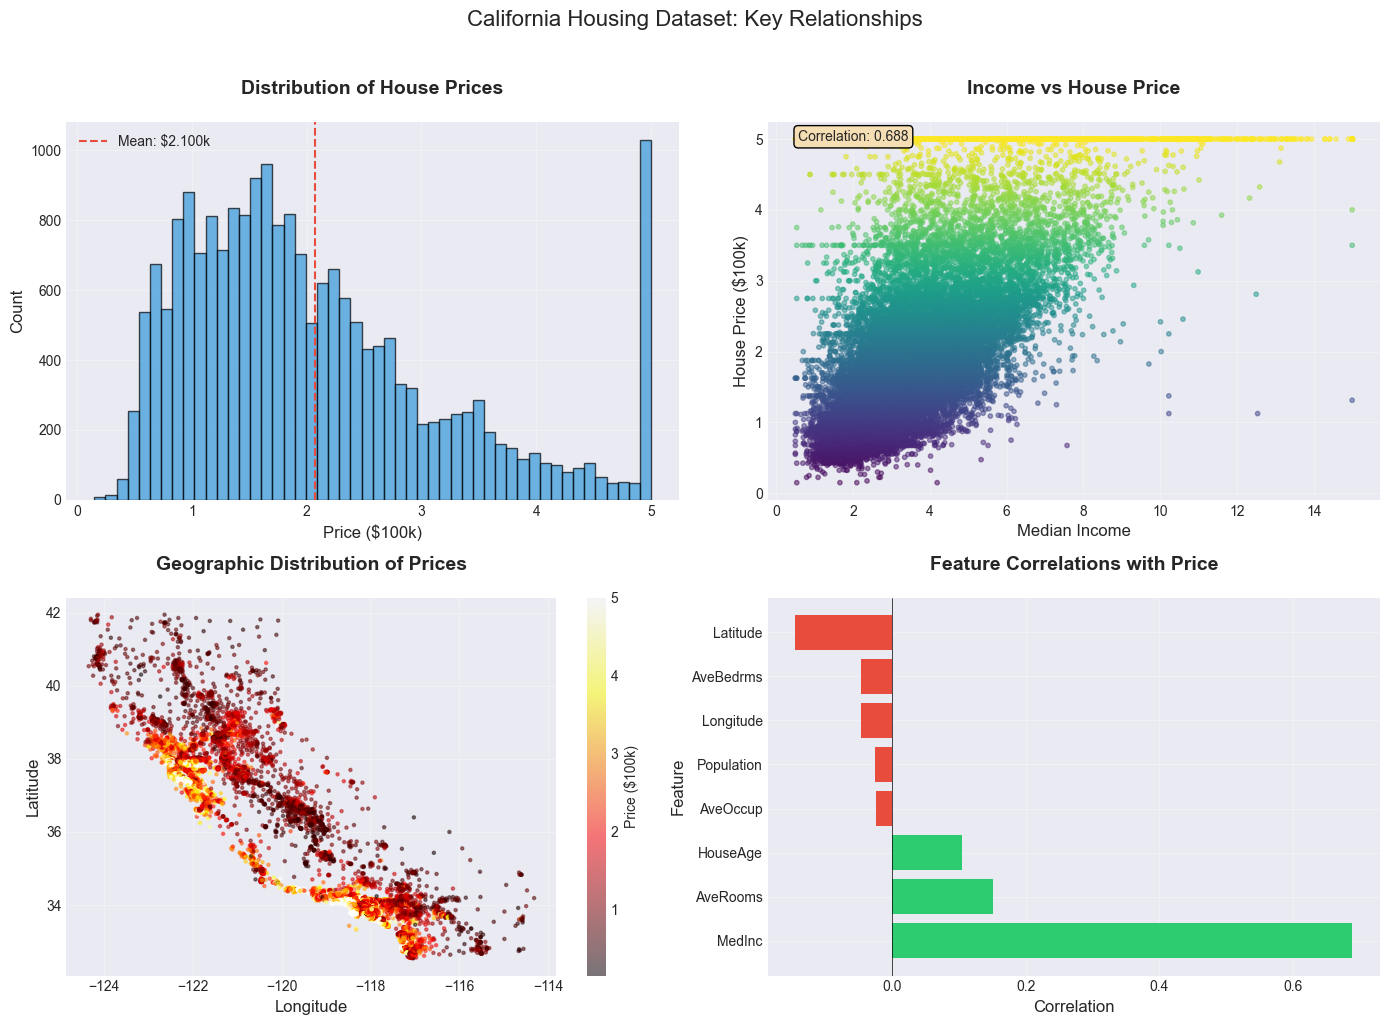

In [9]:
# Create comprehensive data visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('California Housing Dataset: Key Relationships', fontsize=16, y=1.02)

# 1. Target distribution
axes[0, 0].hist(y_full, bins=50, color=COLORS['primary'], alpha=0.7, edgecolor='black')
style_plot(axes[0, 0], 'Distribution of House Prices', 'Price ($100k)', 'Count')
axes[0, 0].axvline(y_full.mean(), color=COLORS['secondary'], linestyle='--', 
                   label=f'Mean: ${y_full.mean():.1f}00k')
axes[0, 0].legend()

# 2. Income vs Price (our focus relationship)
scatter = axes[0, 1].scatter(df['MedInc'], y_full, alpha=0.5, c=y_full, 
                            cmap='viridis', s=10)
style_plot(axes[0, 1], 'Income vs House Price', 'Median Income', 'House Price ($100k)')
axes[0, 1].text(0.05, 0.95, f"Correlation: {df['MedInc'].corr(df['target']):.3f}", 
                transform=axes[0, 1].transAxes, bbox=dict(boxstyle="round", facecolor='wheat'))

# 3. Geographic distribution
scatter_geo = axes[1, 0].scatter(df['Longitude'], df['Latitude'], 
                                c=y_full, cmap='hot', s=5, alpha=0.5)
style_plot(axes[1, 0], 'Geographic Distribution of Prices', 'Longitude', 'Latitude')
plt.colorbar(scatter_geo, ax=axes[1, 0], label='Price ($100k)')

# 4. Feature correlations
corr_with_target = df.corr()['target'].sort_values(ascending=False)[1:]
colors_bar = [COLORS['success'] if x > 0 else COLORS['secondary'] for x in corr_with_target.values]
axes[1, 1].barh(corr_with_target.index, corr_with_target.values, color=colors_bar)
style_plot(axes[1, 1], 'Feature Correlations with Price', 'Correlation', 'Feature')
axes[1, 1].axvline(0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

### Key Insights from Data Exploration

From our exploration, we've discovered:

1. **Median Income is the strongest predictor** (correlation = 0.688)
2. **Geographic location matters** - coastal areas are more expensive
3. **House prices are right-skewed** - few very expensive houses
4. **Age and rooms also correlate** positively with price

For our optimization journey, we'll focus on the income-price relationship first, then expand to all features.


### Preparing Our Dataset for Optimization

We'll create different versions of the dataset for various experiments while maintaining consistency.


In [10]:
# Create focused dataset for initial experiments (Income -> Price)
np.random.seed(42)  # Ensure reproducibility

# Sample for interactive visualizations
sample_size = 2000
sample_indices = np.random.choice(len(df), sample_size, replace=False)

# Simple dataset: just income predicting price
X_simple = df['MedInc'].values[sample_indices].reshape(-1, 1)
y_simple = y_full[sample_indices]

# Full dataset: all features
X_full_sample = X_full[sample_indices]
y_full_sample = y_full[sample_indices]

print(f"✅ Datasets prepared:")
print(f"   Simple dataset: {X_simple.shape} -> {y_simple.shape}")
print(f"   Full dataset: {X_full_sample.shape} -> {y_full_sample.shape}")
print(f"   Using same {sample_size} samples throughout for consistency")

✅ Datasets prepared:
   Simple dataset: (2000, 1) -> (2000,)
   Full dataset: (2000, 8) -> (2000,)
   Using same 2000 samples throughout for consistency


In [11]:
# Standardize features for better optimization
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale simple dataset
X_simple_scaled = scaler_X.fit_transform(X_simple)
y_simple_scaled = scaler_y.fit_transform(y_simple.reshape(-1, 1)).ravel()

# Scale full dataset
scaler_X_full = StandardScaler()
X_full_scaled = scaler_X_full.fit_transform(X_full_sample)

# Split into train and test (consistent split for all experiments)
X_train, X_test, y_train, y_test = train_test_split(
    X_simple_scaled, y_simple_scaled, test_size=0.2, random_state=42
)

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full_scaled, y_full_sample, test_size=0.2, random_state=42
)

print(f"\n📊 Train/Test Split:")
print(f"   Training samples: {len(X_train)}")
print(f"   Test samples: {len(X_test)}")
print(f"   Features scaled to mean=0, std=1 for stable optimization")


📊 Train/Test Split:
   Training samples: 1600
   Test samples: 400
   Features scaled to mean=0, std=1 for stable optimization


## Part 3: Building Intuition - The "Best Line" Game

Before we dive into the mathematics of optimization, let's build intuition. Imagine you're trying to draw the best line through a cloud of points. How would you know when you've found the "best" line?

This section introduces three key concepts:
1. **Loss functions** - How we measure "wrongness"
2. **Parameter space** - All possible lines we could draw
3. **Optimization landscape** - How loss changes with parameters

### Understanding Linear Regression Visually

A line in 2D is defined by two parameters:
- **Weight (w)**: The slope of the line
- **Bias (b)**: Where the line crosses the y-axis

Our goal: Find the w and b that minimize the prediction error.

In [12]:
# Initialize WandB for tracking manual optimization
if USE_WANDB:
    wandb.init(
        project="gradient-descent-education",
        name="manual-line-fitting",
        config={
            "dataset": "california_housing",
            "sample_size": sample_size,
            "feature": "median_income",
            "experiment_type": "manual_optimization"
        }
    )
    print("🎯 WandB initialized! We'll track your manual optimization attempts.")
    print("Watch how your choices affect the loss in real-time!")
else:
    print("📊 Running without WandB tracking. Results will be displayed locally.")

📊 Running without WandB tracking. Results will be displayed locally.


### Interactive Line Fitting: Your First Optimization

Try to find the best line manually! This exercise will help you understand what gradient descent does automatically.


In [13]:
class InteractiveLineFitter:
    """Interactive tool for manual line fitting"""
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.history = {'w': [], 'b': [], 'loss': []}
        self.best_loss = float('inf')
        self.best_params = {'w': 0, 'b': 0}
        
    def calculate_loss(self, w, b):
        """Calculate Mean Squared Error"""
        predictions = self.X * w + b
        mse = np.mean((predictions - self.y) ** 2)
        return mse
    
    def update_visualization(self, w, b):
        """Update the visualization with current parameters"""
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
        fig.suptitle('Manual Optimization: Can You Beat the Algorithm?', fontsize=16)
        
        # Left: Data and current line
        ax1.scatter(self.X, self.y, alpha=0.3, s=30, color=COLORS['primary'])
        
        x_range = np.linspace(self.X.min(), self.X.max(), 100)
        y_pred_line = x_range * w + b
        ax1.plot(x_range, y_pred_line, 'r-', linewidth=3, 
                label=f'y = {w:.2f}x + {b:.2f}')
        
        # Show residuals
        predictions = self.X * w + b
        for i in range(0, len(self.X), 20):
            ax1.plot([self.X[i], self.X[i]], [self.y[i], predictions[i]], 
                    'gray', alpha=0.3, linewidth=1)
        
        loss = self.calculate_loss(w, b)
        style_plot(ax1, f'Current Loss: {loss:.4f}', 
                  'Income (scaled)', 'Price (scaled)')
        ax1.legend()
        
        # Middle: Loss history
        self.history['w'].append(w)
        self.history['b'].append(b)
        self.history['loss'].append(loss)
        
        ax2.plot(self.history['loss'], 'b-', linewidth=2)
        ax2.scatter(len(self.history['loss'])-1, loss, 
                   color='red', s=100, zorder=5)
        
        if loss < self.best_loss:
            self.best_loss = loss
            self.best_params = {'w': w, 'b': b}
            ax2.axhline(y=self.best_loss, color='green', linestyle='--', 
                       label=f'Best: {self.best_loss:.4f}')
        
        style_plot(ax2, 'Your Optimization Journey', 'Attempt', 'MSE Loss')
        ax2.legend()
        
        # Right: Gradient information
        # Calculate gradients at current point
        errors = predictions - self.y
        grad_w = 2 * np.mean(self.X * errors)
        grad_b = 2 * np.mean(errors)
        
        # Visualize gradient direction
        ax3.arrow(w, b, -grad_w*0.1, -grad_b*0.1, 
                 head_width=0.05, head_length=0.03, 
                 fc=COLORS['secondary'], ec=COLORS['secondary'])
        ax3.scatter([w], [b], color='red', s=100, zorder=5)
        ax3.set_xlim(w-0.5, w+0.5)
        ax3.set_ylim(b-0.5, b+0.5)
        style_plot(ax3, 'Gradient Direction', 'Weight (w)', 'Bias (b)')
        ax3.text(0.05, 0.95, f'∇w = {grad_w:.3f}\n∇b = {grad_b:.3f}', 
                transform=ax3.transAxes, 
                bbox=dict(boxstyle="round", facecolor='wheat'))
        
        plt.tight_layout()
        plt.show()
        
        # Log to WandB
        if USE_WANDB:
            wandb.log({
                "manual_weight": w,
                "manual_bias": b,
                "manual_loss": loss,
                "manual_grad_w": grad_w,
                "manual_grad_b": grad_b,
                "iteration": len(self.history['loss'])
            })
        
        return loss

🎮 INTERACTIVE LINE FITTER
Instructions:
1. Adjust the sliders to change the line
2. Try to minimize the loss (get it below 0.5)
3. The red arrow shows the gradient direction
4. Watch your progress in the middle plot


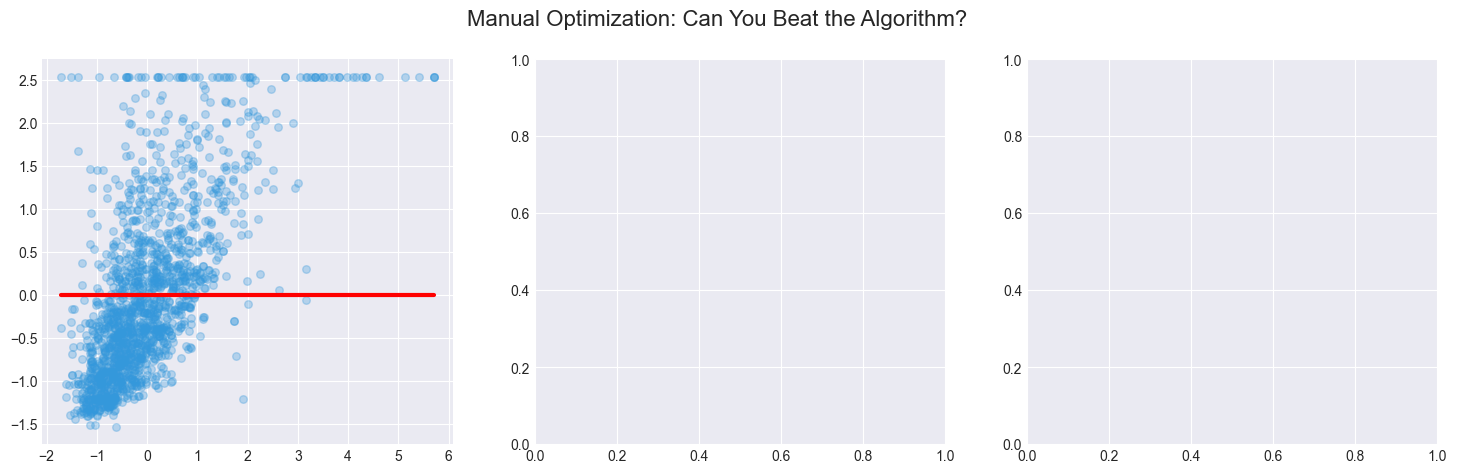

interactive(children=(FloatSlider(value=0.0, description='Weight (w):', max=2.0, min=-2.0, step=0.01, style=Sl…

In [14]:
# Create the interactive widget
fitter = InteractiveLineFitter(X_train, y_train)

print("🎮 INTERACTIVE LINE FITTER")
print("="*50)
print("Instructions:")
print("1. Adjust the sliders to change the line")
print("2. Try to minimize the loss (get it below 0.5)")
print("3. The red arrow shows the gradient direction")
print("4. Watch your progress in the middle plot")
print("="*50)

@interact(
    w=widgets.FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.01,
                         description='Weight (w):', style={'description_width': 'initial'}),
    b=widgets.FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.01,
                         description='Bias (b):', style={'description_width': 'initial'})
)
def manual_fit(w=0.0, b=0.0):
    loss = fitter.update_visualization(w, b)
    
    if loss < 0.5:
        print("🎉 Excellent! You've found a good fit!")
    elif loss < 1.0:
        print("👍 Good progress! Can you get the loss below 0.5?")
    else:
        print("💡 Tip: Follow the red arrow - it points downhill!")

### The Loss Landscape: A 3D Perspective

Now let's see the complete picture - the loss landscape shows the error for every possible combination of weights and biases.


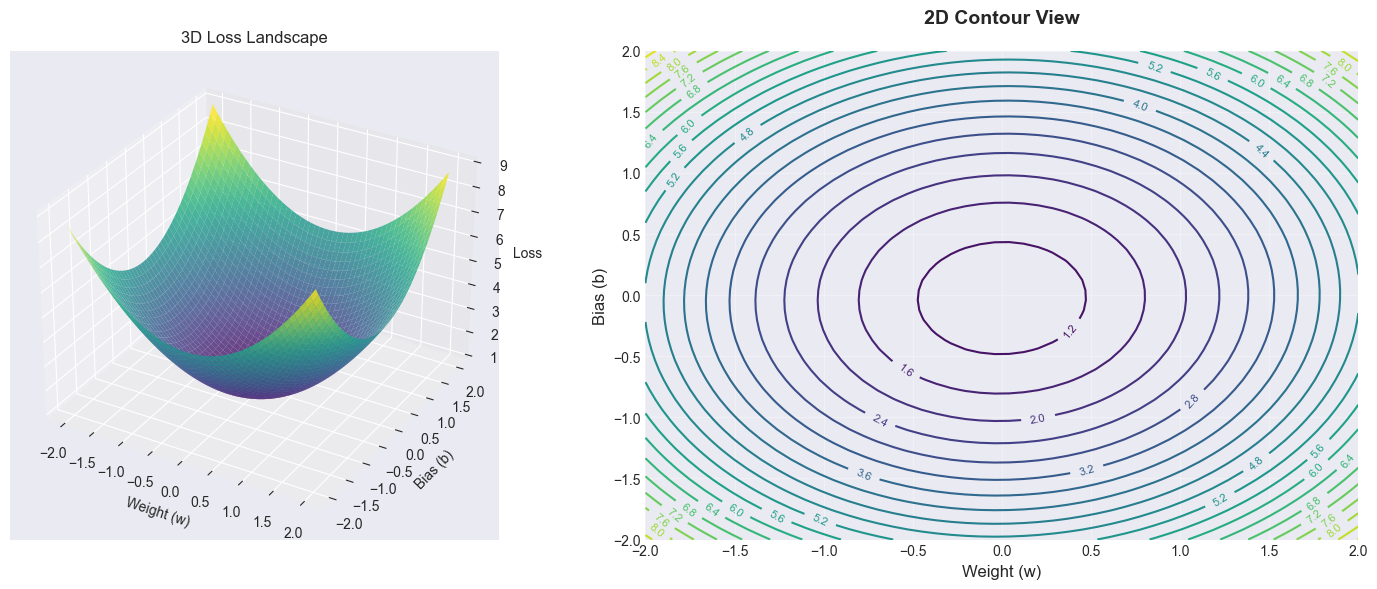


📍 Optimal parameters:
   Weight (w) = -0.041
   Bias (b) = -0.041
   Minimum loss = 0.9895


In [15]:
def create_loss_landscape_visualization():
    """Create an interactive 3D visualization of the loss surface"""
    
    # Create parameter grid
    w_range = np.linspace(-2, 2, 50)
    b_range = np.linspace(-2, 2, 50)
    W, B = np.meshgrid(w_range, b_range)
    
    # Calculate loss for each parameter combination
    Z = np.zeros_like(W)
    for i in range(50):
        for j in range(50):
            predictions = X_train * W[i, j] + B[i, j]
            Z[i, j] = np.mean((predictions - y_train) ** 2)
    
    # Create 3D visualization
    fig = plt.figure(figsize=(15, 6))
    
    # 3D surface plot
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(W, B, Z, cmap='viridis', alpha=0.8)
    
    # Add the manual optimization path
    if len(fitter.history['w']) > 0:
        ax1.plot(fitter.history['w'], fitter.history['b'], 
                fitter.history['loss'], 'r-', linewidth=3, label='Your Path')
        ax1.scatter(fitter.history['w'][-1], fitter.history['b'][-1], 
                   fitter.history['loss'][-1], color='red', s=100)
    
    ax1.set_xlabel('Weight (w)')
    ax1.set_ylabel('Bias (b)')
    ax1.set_zlabel('Loss')
    ax1.set_title('3D Loss Landscape')
    
    # 2D contour plot
    ax2 = fig.add_subplot(122)
    contour = ax2.contour(W, B, Z, levels=20, cmap='viridis')
    ax2.clabel(contour, inline=True, fontsize=8)
    
    # Add optimization path
    if len(fitter.history['w']) > 0:
        ax2.plot(fitter.history['w'], fitter.history['b'], 'r.-', 
                linewidth=2, markersize=8, label='Your Path')
        ax2.scatter(fitter.history['w'][0], fitter.history['b'][0], 
                   color='green', s=100, marker='o', label='Start')
        ax2.scatter(fitter.history['w'][-1], fitter.history['b'][-1], 
                   color='red', s=100, marker='*', label='Current')
    
    style_plot(ax2, '2D Contour View', 'Weight (w)', 'Bias (b)')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Find and display the optimal point
    min_idx = np.unravel_index(Z.argmin(), Z.shape)
    optimal_w = W[min_idx]
    optimal_b = B[min_idx]
    optimal_loss = Z[min_idx]
    
    print(f"\n📍 Optimal parameters:")
    print(f"   Weight (w) = {optimal_w:.3f}")
    print(f"   Bias (b) = {optimal_b:.3f}")
    print(f"   Minimum loss = {optimal_loss:.4f}")
    
    if len(fitter.history['w']) > 0:
        your_best = min(fitter.history['loss'])
        print(f"\n🎯 Your best attempt:")
        print(f"   Weight (w) = {fitter.best_params['w']:.3f}")
        print(f"   Bias (b) = {fitter.best_params['b']:.3f}")
        print(f"   Your best loss = {your_best:.4f}")
        print(f"   Difference from optimal = {your_best - optimal_loss:.4f}")

# Visualize the loss landscape
create_loss_landscape_visualization()

### Key Insights from Manual Optimization

From this exercise, we've learned several crucial concepts:

1. **The Loss Surface is Convex**: For linear regression, there's exactly one global minimum - no local traps!

2. **Gradients Point Downhill**: The red arrows always point toward lower loss. This is the key insight behind gradient descent.

3. **Parameter Updates Matter**: Small changes in parameters can lead to big changes in loss, especially near the optimum.

4. **Manual Optimization is Tedious**: Even for just 2 parameters, finding the optimum manually is challenging. Imagine doing this for millions of parameters!

This is why we need automatic optimization algorithms like gradient descent.

## Part 4: Manual Gradient Descent - Building the Algorithm

Now that we have intuition, let's build gradient descent from scratch. We'll start with the mathematics, then implement each component.

### The Mathematics Behind Gradient Descent

For a linear model $\hat{y} = wx + b$, we want to minimize the Mean Squared Error:

$$L(w, b) = \frac{1}{n}\sum_{i=1}^{n}(y_i - (wx_i + b))^2$$

### Calculating Gradients

To find the direction of steepest descent, we calculate partial derivatives:

**Gradient with respect to weight:**
$$\frac{\partial L}{\partial w} = -\frac{2}{n}\sum_{i=1}^{n}x_i(y_i - (wx_i + b)) = \frac{2}{n}\sum_{i=1}^{n}x_i(wx_i + b - y_i)$$

**Gradient with respect to bias:**
$$\frac{\partial L}{\partial b} = -\frac{2}{n}\sum_{i=1}^{n}(y_i - (wx_i + b)) = \frac{2}{n}\sum_{i=1}^{n}(wx_i + b - y_i)$$


### The Update Rule

Once we have gradients, we update parameters in the opposite direction:

$$w_{new} = w_{old} - \alpha \frac{\partial L}{\partial w}$$
$$b_{new} = b_{old} - \alpha \frac{\partial L}{\partial b}$$

Where $\alpha$ (alpha) is the learning rate - it controls how big our steps are.

### Implementing Gradient Descent from Scratch

Let's implement these equations in code, building our own gradient descent optimizer.

In [20]:
class ManualGradientDescent:
    """Gradient Descent implemented from scratch"""
    
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.w = 0.0  # Initialize weight
        self.b = 0.0  # Initialize bias
        self.history = {
            'w': [], 'b': [], 'loss': [], 
            'grad_w': [], 'grad_b': []
        }
    
    def calculate_gradients(self, X, y):
        """Calculate gradients of the loss with respect to w and b"""
        n = len(X)
        
        # Forward pass: make predictions
        predictions = X * self.w + self.b
        
        # Calculate errors
        errors = predictions - y
        
        # Calculate gradients using our derived formulas
        grad_w = (2/n) * np.sum(X * errors)
        grad_b = (2/n) * np.sum(errors)
        
        return grad_w, grad_b
    
    def calculate_loss(self, X, y):
        """Calculate Mean Squared Error"""
        predictions = X * self.w + self.b
        mse = np.mean((predictions - y) ** 2)
        return mse
    
    def step(self, X, y):
        """Perform one gradient descent step"""
        # 1. Calculate gradients
        grad_w, grad_b = self.calculate_gradients(X, y)
        
        # 2. Update parameters (gradient descent rule)
        self.w = self.w - self.learning_rate * grad_w
        self.b = self.b - self.learning_rate * grad_b
        
        # 3. Calculate new loss
        loss = self.calculate_loss(X, y)
        
        # 4. Store history for visualization
        self.history['w'].append(self.w)
        self.history['b'].append(self.b)
        self.history['loss'].append(loss)
        self.history['grad_w'].append(grad_w)
        self.history['grad_b'].append(grad_b)
        
        return loss, grad_w, grad_b
    
    def fit(self, X, y, epochs=100, verbose=True):
        """Train the model using gradient descent"""
        print(f"🚀 Starting Gradient Descent")
        print(f"   Learning rate: {self.learning_rate}")
        print(f"   Initial parameters: w={self.w:.3f}, b={self.b:.3f}")
        print("="*50)
        
        for epoch in range(epochs):
            loss, grad_w, grad_b = self.step(X, y)
            
            if verbose and epoch % 10 == 0:
                print(f"Epoch {epoch:3d}: Loss = {loss:.4f}, "
                      f"w = {self.w:6.3f}, b = {self.b:6.3f}, "
                      f"||∇|| = {np.sqrt(grad_w**2 + grad_b**2):.4f}")
            
            # Log to WandB
            wandb.log({
                "gd_loss": loss,
                "gd_weight": self.w,
                "gd_bias": self.b,
                "gd_grad_w": grad_w,
                "gd_grad_b": grad_b,
                "gd_grad_norm": np.sqrt(grad_w**2 + grad_b**2),
                "epoch": epoch
            })
        
        print("="*50)
        print(f"✅ Training complete!")
        print(f"   Final parameters: w={self.w:.3f}, b={self.b:.3f}")
        print(f"   Final loss: {self.history['loss'][-1]:.4f}")

### Testing Our Implementation

Let's test our gradient descent implementation and see how it automatically finds the optimal parameters.

In [21]:
# Initialize and train our gradient descent
gd = ManualGradientDescent(learning_rate=0.1)
gd.fit(X_train, y_train, epochs=50)

🚀 Starting Gradient Descent
   Learning rate: 0.1
   Initial parameters: w=0.000, b=0.000
Epoch   0: Loss = 61.7585, w =  0.139, b = -7.816, ||∇|| = 78.1757
Epoch  10: Loss = 7647637659455777020245353040721064264780721600593920.0000, w = 12960972212876424985444352.000, b = -86306060152191653209178112.000, ||∇|| = 875463390595877560970641408.0000
Epoch  20: Loss = 1000048012317272569460540988561784452331291375222783333341172578322851183598766021438340873089846345728.0000, w = 216909332165656327592271755310459606363078567919616.000, b = -973641352419558102226192067906975907656160031801344.000, ||∇|| = 10006217930458218860236480878970215602796274990972928.0000
Epoch  30: Loss = 132178322057074412392230414857530874708185105027240529504823435325021713318565466583621586606950367356209459527837628594105217881493851481321440762920960.0000, w = 2901110976543911486374548602031269472142675148246613759856056488976604725248.000, b = -11093380013873460686485016817599061014362945862349840331066966428

### Visualizing the Optimization Journey

Now let's create a comprehensive visualization showing how gradient descent navigates the loss landscape.

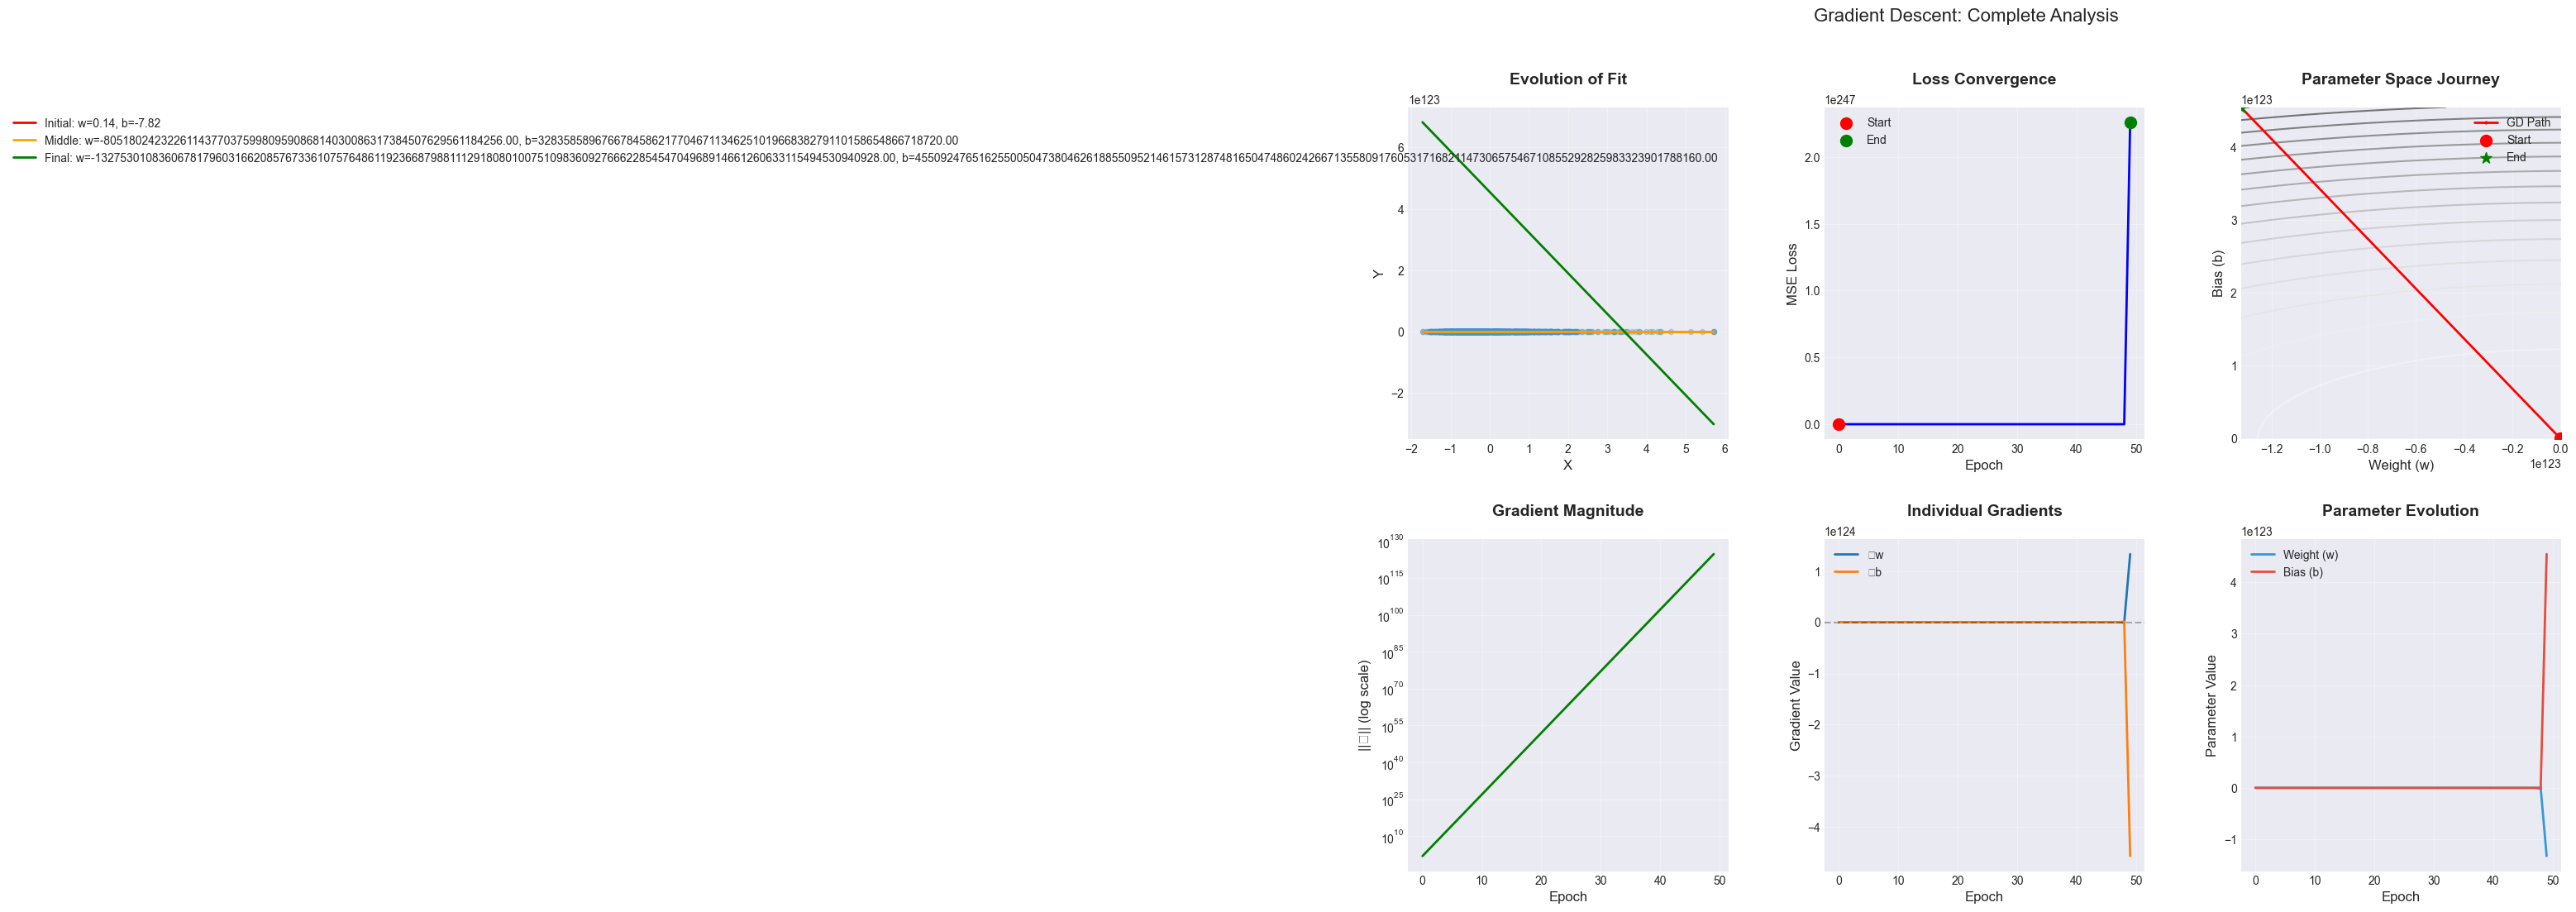

In [22]:
def visualize_gradient_descent_journey(gd_model, X, y):
    """Create visualization of gradient descent optimization process"""
    
    fig = plt.figure(figsize=(18, 12))
    
    # Create 2x3 subplot grid
    gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)
    
    # 1. Data and evolving fit
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.scatter(X, y, alpha=0.3, s=20, color=COLORS['primary'])
    
    # Show initial, middle, and final fits
    epochs_to_show = [0, len(gd_model.history['w'])//2, -1]
    colors = ['red', 'orange', 'green']
    labels = ['Initial', 'Middle', 'Final']
    
    for idx, (epoch, color, label) in enumerate(zip(epochs_to_show, colors, labels)):
        w = gd_model.history['w'][epoch]
        b = gd_model.history['b'][epoch]
        x_range = np.linspace(X.min(), X.max(), 100)
        y_pred = x_range * w + b
        ax1.plot(x_range, y_pred, color=color, linewidth=2, 
                label=f'{label}: w={w:.2f}, b={b:.2f}')
    
    style_plot(ax1, 'Evolution of Fit', 'X', 'Y')
    ax1.legend()
    
    # 2. Loss curve
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.plot(gd_model.history['loss'], 'b-', linewidth=2)
    ax2.scatter([0], [gd_model.history['loss'][0]], 
               color='red', s=100, zorder=5, label='Start')
    ax2.scatter([len(gd_model.history['loss'])-1], 
               [gd_model.history['loss'][-1]], 
               color='green', s=100, zorder=5, label='End')
    style_plot(ax2, 'Loss Convergence', 'Epoch', 'MSE Loss')
    ax2.legend()
    
    # 3. Parameter space journey
    ax3 = fig.add_subplot(gs[0, 2])
    
    # Create contour plot
    w_range = np.linspace(min(gd_model.history['w'])-0.5, 
                         max(gd_model.history['w'])+0.5, 50)
    b_range = np.linspace(min(gd_model.history['b'])-0.5, 
                         max(gd_model.history['b'])+0.5, 50)
    W, B = np.meshgrid(w_range, b_range)
    Z = np.zeros_like(W)
    
    for i in range(50):
        for j in range(50):
            predictions = X * W[i, j] + B[i, j]
            Z[i, j] = np.mean((predictions - y) ** 2)
    
    contour = ax3.contour(W, B, Z, levels=15, alpha=0.6)
    ax3.clabel(contour, inline=True, fontsize=8)
    
    # Plot optimization path
    ax3.plot(gd_model.history['w'], gd_model.history['b'], 
            'r.-', linewidth=2, markersize=4, label='GD Path')
    ax3.scatter([gd_model.history['w'][0]], [gd_model.history['b'][0]], 
               color='red', s=100, marker='o', zorder=5, label='Start')
    ax3.scatter([gd_model.history['w'][-1]], [gd_model.history['b'][-1]], 
               color='green', s=100, marker='*', zorder=5, label='End')
    
    style_plot(ax3, 'Parameter Space Journey', 'Weight (w)', 'Bias (b)')
    ax3.legend()
    
    # 4. Gradient magnitude over time
    ax4 = fig.add_subplot(gs[1, 0])
    grad_norms = [np.sqrt(gw**2 + gb**2) for gw, gb in 
                  zip(gd_model.history['grad_w'], gd_model.history['grad_b'])]
    ax4.semilogy(grad_norms, 'g-', linewidth=2)
    style_plot(ax4, 'Gradient Magnitude', 'Epoch', '||∇|| (log scale)')
    
    # 5. Learning dynamics
    ax5 = fig.add_subplot(gs[1, 1])
    ax5.plot(gd_model.history['grad_w'], label='∇w', linewidth=2)
    ax5.plot(gd_model.history['grad_b'], label='∇b', linewidth=2)
    ax5.axhline(y=0, color='black', linestyle='--', alpha=0.3)
    style_plot(ax5, 'Individual Gradients', 'Epoch', 'Gradient Value')
    ax5.legend()
    
    # 6. Parameter evolution
    ax6 = fig.add_subplot(gs[1, 2])
    ax6.plot(gd_model.history['w'], label='Weight (w)', 
            color=COLORS['primary'], linewidth=2)
    ax6.plot(gd_model.history['b'], label='Bias (b)', 
            color=COLORS['secondary'], linewidth=2)
    style_plot(ax6, 'Parameter Evolution', 'Epoch', 'Parameter Value')
    ax6.legend()
    
    plt.suptitle('Gradient Descent: Complete Analysis', fontsize=16)
    plt.show()

# Create the visualization
visualize_gradient_descent_journey(gd, X_train, y_train)

### Understanding Gradient Descent Behavior

From our visualization, we can observe several important patterns:

1. **Fast Initial Progress**: The loss drops quickly in early epochs when gradients are large
2. **Convergence Slowdown**: As we approach the minimum, gradients become smaller
3. **Smooth Path**: With good learning rate, GD follows a smooth path to the minimum
4. **Gradient Decay**: Gradient magnitude decreases exponentially near convergence

These patterns are fundamental to understanding optimization in machine learning.

### The Effect of Learning Rate

Learning rate is the most critical hyperparameter in gradient descent. Let's explore its impact interactively.


Training stopped early for LR=0.001 due to divergence
Training stopped early for LR=0.01 due to divergence
Training stopped early for LR=0.1 due to divergence
Training stopped early for LR=0.2 due to divergence


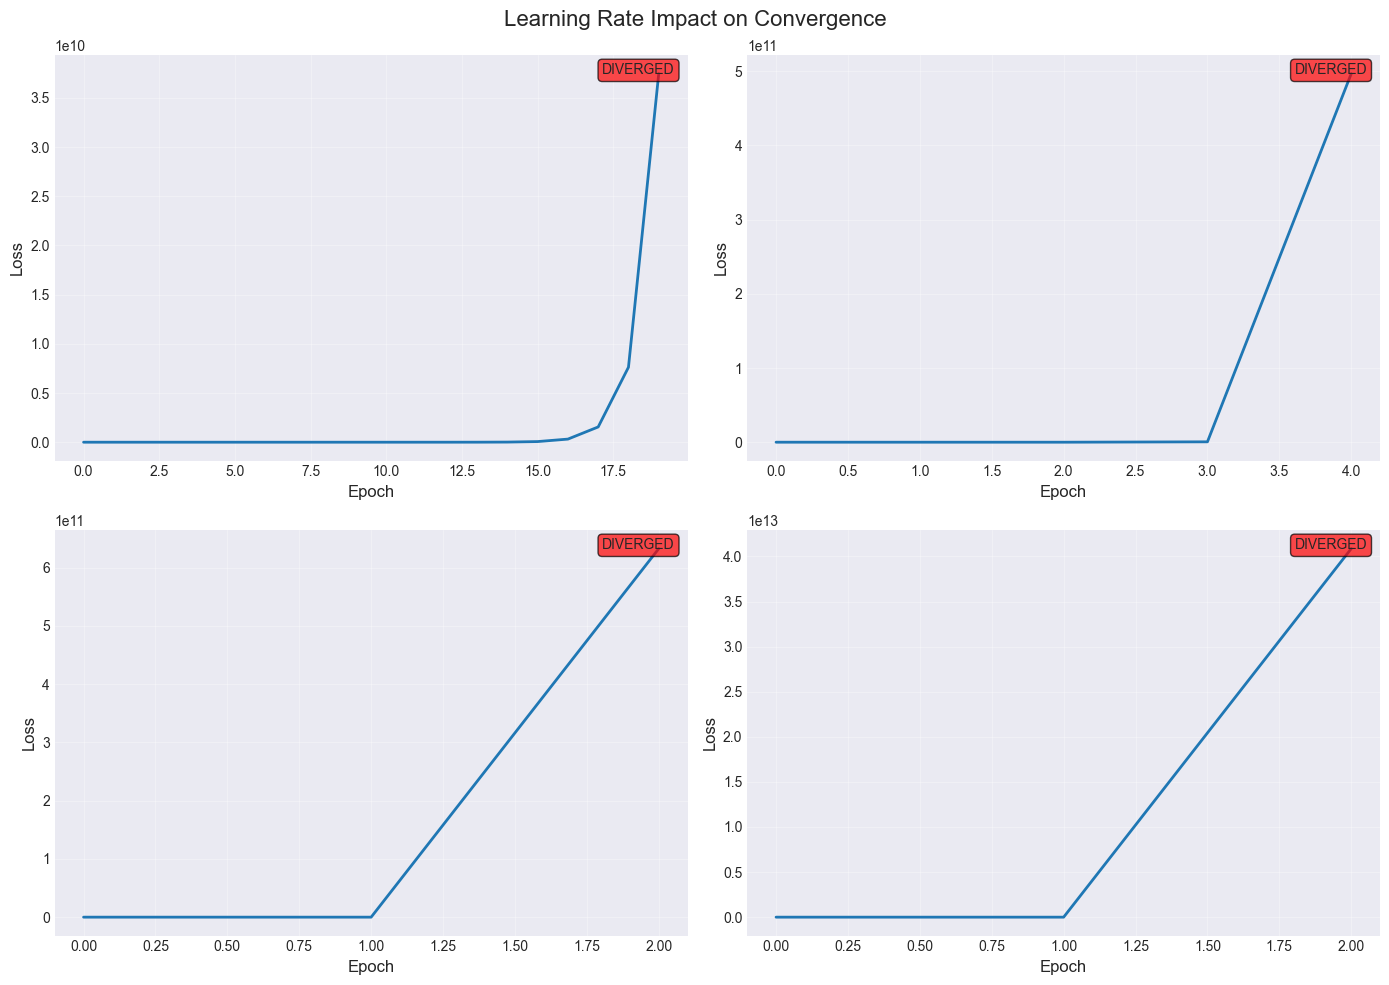

📊 Learning Rate Analysis:
• Too Small (0.001): Convergence is extremely slow
• Just Right (0.01-0.1): Smooth and efficient convergence
• Too Large (0.2): May have oscillations or divergence


In [27]:
def learning_rate_comparison():
    """Compare different learning rates side by side"""
    
    # Use more stable learning rates
    learning_rates = [0.001, 0.01, 0.1, 0.2]  # Changed 0.5 to 0.2 to avoid divergence
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Learning Rate Impact on Convergence', fontsize=16)
    
    for idx, lr in enumerate(learning_rates):
        ax = axes[idx // 2, idx % 2]
        
        try:
            # Train with different learning rate
            gd_temp = ManualGradientDescent(learning_rate=lr)
            
            # Run for same number of epochs with early stopping
            for epoch in range(50):
                gd_temp.step(X_train, y_train)
                # Check for divergence and stop early
                if (len(gd_temp.history['loss']) > 1 and 
                    (np.isnan(gd_temp.history['loss'][-1]) or 
                     gd_temp.history['loss'][-1] > 1e10 or
                     np.isinf(gd_temp.history['loss'][-1]))):
                    print(f"Training stopped early for LR={lr} due to divergence")
                    break
            
            # Plot results
            ax.plot(gd_temp.history['loss'], linewidth=2)
            
            # Check for divergence
            if (len(gd_temp.history['loss']) > 1 and 
                (np.isnan(gd_temp.history['loss'][-1]) or 
                 np.isinf(gd_temp.history['loss'][-1]) or
                 gd_temp.history['loss'][-1] > gd_temp.history['loss'][0])):
                ax.set_title(f'LR = {lr} (DIVERGED!)', color='red', fontweight='bold')
            else:
                ax.set_title(f'LR = {lr}', fontweight='bold')
                # Only use log scale if no divergence
                if all(np.isfinite(loss) and loss > 0 for loss in gd_temp.history['loss']):
                    ax.set_yscale('log')
            
            style_plot(ax, '', 'Epoch', 'Loss')
            
            # Add text box with final loss (handle large values)
            if len(gd_temp.history['loss']) > 0:
                final_loss = gd_temp.history['loss'][-1]
                if (not np.isnan(final_loss) and 
                    not np.isinf(final_loss) and 
                    abs(final_loss) < 1e10):
                    ax.text(0.98, 0.98, f'Final: {final_loss:.4f}', 
                            transform=ax.transAxes, ha='right', va='top',
                            bbox=dict(boxstyle='round', facecolor='wheat'))
                else:
                    ax.text(0.98, 0.98, 'DIVERGED', 
                            transform=ax.transAxes, ha='right', va='top',
                            bbox=dict(boxstyle='round', facecolor='red', alpha=0.7))
                
        except Exception as e:
            ax.set_title(f'LR = {lr} (ERROR)', color='red', fontweight='bold')
            ax.text(0.5, 0.5, f'Error: {str(e)[:30]}', 
                    transform=ax.transAxes, ha='center', va='center',
                    bbox=dict(boxstyle='round', facecolor='red', alpha=0.7))
    
    plt.tight_layout()
    plt.show()
    
    print("📊 Learning Rate Analysis:")
    print("• Too Small (0.001): Convergence is extremely slow")
    print("• Just Right (0.01-0.1): Smooth and efficient convergence")
    print("• Too Large (0.2): May have oscillations or divergence")

# Call the function
learning_rate_comparison()

### Interactive Learning Rate Explorer

Now let's create an interactive tool to explore learning rates with additional features.

In [29]:
@interact(
    learning_rate=widgets.FloatLogSlider(
        value=0.01, min=-3, max=0, step=0.01,
        description='Learning Rate:', 
        style={'description_width': 'initial'}
    ),
    add_noise=widgets.Checkbox(value=False, description='Add Noise to Data'),
    epochs=widgets.IntSlider(
        value=50, min=10, max=200, step=10, 
        description='Epochs:'
    ),
    momentum=widgets.FloatSlider(
        value=0.0, min=0.0, max=0.9, step=0.1,
        description='Momentum:', 
        style={'description_width': 'initial'}
    )
)
def explore_gradient_descent(learning_rate=0.01, add_noise=False, 
                           epochs=50, momentum=0.0):
    """Interactive exploration of gradient descent parameters"""
    
    # Prepare data
    X_exp = X_train.copy()
    y_exp = y_train.copy()
    
    if add_noise:
        y_exp += np.random.normal(0, 0.1, size=y_exp.shape)
    
    # IMPORTANT: Normalize the data to prevent divergence
    X_exp = (X_exp - X_exp.mean()) / (X_exp.std() + 1e-8)
    
    # Modified GD with momentum
    class GDWithMomentum:
        def __init__(self, lr, momentum):
            self.lr = lr
            self.momentum = momentum
            self.w = np.random.normal(0, 0.01)  # Small random initialization
            self.b = np.random.normal(0, 0.01)
            self.v_w = 0.0  # Velocity for w
            self.v_b = 0.0  # Velocity for b
            self.history = {'loss': []}
        
        def step(self, X, y):
            # Calculate predictions
            predictions = X * self.w + self.b
            
            # Calculate loss
            loss = np.mean((predictions - y) ** 2)
            
            # Check for divergence
            if np.isnan(loss) or np.isinf(loss) or loss > 1e10:
                return loss
            
            self.history['loss'].append(loss)
            
            # Calculate gradients
            errors = predictions - y
            grad_w = (2/len(X)) * np.sum(X * errors)
            grad_b = (2/len(X)) * np.sum(errors)
            
            # Clip gradients to prevent explosion
            grad_w = np.clip(grad_w, -1.0, 1.0)
            grad_b = np.clip(grad_b, -1.0, 1.0)
            
            # Update velocities with momentum
            self.v_w = self.momentum * self.v_w - self.lr * grad_w
            self.v_b = self.momentum * self.v_b - self.lr * grad_b
            
            # Update parameters
            self.w += self.v_w
            self.b += self.v_b
            
            return loss
    
    # Train model
    model = GDWithMomentum(learning_rate, momentum)
    
    for epoch in range(epochs):
        loss = model.step(X_exp, y_exp)
        
        # Early stopping for divergence
        if np.isnan(loss) or np.isinf(loss) or loss > 1e10:
            print(f"Training diverged at epoch {epoch}")
            break
            
        # Check for consistent increase in loss
        if len(model.history['loss']) > 10:
            recent_losses = model.history['loss'][-10:]
            if all(recent_losses[i] >= recent_losses[i-1] for i in range(1, len(recent_losses))):
                if len(recent_losses) > 1 and recent_losses[-1] > recent_losses[0]:
                    print("Early stopping: Loss consistently increasing")
                    break
    
    # Visualize results
    if len(model.history['loss']) > 0:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        
        # Loss curve
        ax1.plot(model.history['loss'], linewidth=2, color=COLORS['primary'])
        style_plot(ax1, f'Loss Curve (LR={learning_rate:.3f}, Mom={momentum})', 
                  'Epoch', 'Loss')
        
        # Check for divergence in visualization
        if (len(model.history['loss']) > 1 and 
            model.history['loss'][-1] > model.history['loss'][0] * 1.1):  # 10% increase threshold
            ax1.text(0.5, 0.5, 'DIVERGED!', transform=ax1.transAxes,
                    ha='center', va='center', fontsize=20, color='red',
                    bbox=dict(boxstyle='round', facecolor='yellow'))
        
        # Final fit
        ax2.scatter(X_exp, y_exp, alpha=0.3, s=20, color=COLORS['primary'])
        x_range = np.linspace(X_exp.min(), X_exp.max(), 100)
        y_pred = x_range * model.w + model.b
        ax2.plot(x_range, y_pred, 'r-', linewidth=2)
        style_plot(ax2, f'Final Fit (Loss={model.history["loss"][-1]:.4f})', 
                  'X', 'Y')
        
        plt.tight_layout()
        plt.show()
        
        # Analysis
        convergence_speed = epochs
        if len(model.history['loss']) > 1:
            for i, loss in enumerate(model.history['loss']):
                if i > 0 and abs(loss - model.history['loss'][-1]) < 0.001:
                    convergence_speed = i
                    break
        
        print(f"📊 Results:")
        print(f"   Final loss: {model.history['loss'][-1]:.4f}")
        print(f"   Convergence at epoch: {convergence_speed}")
        print(f"   Final parameters: w={model.w:.3f}, b={model.b:.3f}")
        
        if momentum > 0:
            print(f"\n💡 Momentum effect: Helps escape shallow regions and accelerate convergence")
    else:
        print("Training failed - no loss history available")

interactive(children=(FloatLogSlider(value=0.01, description='Learning Rate:', max=0.0, min=-3.0, step=0.01, s…

## Part 5: Stochastic Gradient Descent - Scaling to Big Data

So far, we've used all training data for each gradient calculation (batch gradient descent). This becomes impractical with millions of samples. Enter Stochastic Gradient Descent (SGD) and its variants.

### Three Flavors of Gradient Descent

1. **Batch GD**: Use all data → Accurate but slow
2. **Stochastic GD**: Use one sample → Fast but noisy
3. **Mini-batch GD**: Use small batches → Best of both worlds

### Implementing SGD Variants

Let's implement all three variants and compare their behavior on our dataset.

In [31]:
class StochasticGradientDescent:
    """Implementation of SGD variants: batch, stochastic, and mini-batch"""
    
    def __init__(self, learning_rate=0.01, batch_size=32, method='mini-batch'):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.method = method  # 'batch', 'stochastic', 'mini-batch'
        self.w = np.random.randn() * 0.01
        self.b = 0.0
        self.history = {'loss': [], 'time': [], 'epoch_loss': []}
        self.iteration = 0
    
    def get_batch(self, X, y, indices=None):
        """Get a batch of data based on the method"""
        n = len(X)
        
        if self.method == 'batch':
            # Use all data
            return X, y, np.arange(n)
            
        elif self.method == 'stochastic':
            # Use single random sample
            if indices is None:
                idx = np.random.randint(n)
            else:
                idx = indices[self.iteration % len(indices)]
            return X[idx:idx+1], y[idx:idx+1], [idx]
            
        else:  # mini-batch
            # Use random batch
            if indices is None:
                batch_indices = np.random.choice(n, self.batch_size, replace=False)
            else:
                start = (self.iteration * self.batch_size) % len(indices)
                end = start + self.batch_size
                if end > len(indices):
                    batch_indices = np.concatenate([
                        indices[start:],
                        indices[:end-len(indices)]
                    ])
                else:
                    batch_indices = indices[start:end]
            
            return X[batch_indices], y[batch_indices], batch_indices
    def train_epoch(self, X, y, verbose=False):
        """Train for one epoch"""
        n = len(X)
        
        # Shuffle data at start of epoch
        indices = np.random.permutation(n)
        
        # Determine number of iterations per epoch
        if self.method == 'batch':
            n_iterations = 1
        elif self.method == 'stochastic':
            n_iterations = n
        else:  # mini-batch
            n_iterations = n // self.batch_size
        
        epoch_losses = []
        
        for i in range(n_iterations):
            # Get batch
            X_batch, y_batch, batch_idx = self.get_batch(X, y, indices)
            
            # Calculate gradients on batch
            predictions = X_batch * self.w + self.b
            errors = predictions - y_batch
            grad_w = (2/len(X_batch)) * np.sum(X_batch * errors)
            grad_b = (2/len(X_batch)) * np.sum(errors)
            
            # Update parameters
            self.w -= self.learning_rate * grad_w
            self.b -= self.learning_rate * grad_b
            
            # Calculate batch loss
            batch_loss = np.mean(errors ** 2)
            epoch_losses.append(batch_loss)
            
            self.iteration += 1
            
            if verbose and i % 100 == 0:
                print(f"  Iteration {i}/{n_iterations}, Batch loss: {batch_loss:.4f}")
        
        # Calculate full epoch loss on all data
        full_predictions = X * self.w + self.b
        epoch_loss = np.mean((full_predictions - y) ** 2)
        
        return epoch_loss, np.mean(epoch_losses)
    
    def fit(self, X, y, epochs=10, verbose=True):
        """Train the model"""
        print(f"\n🚀 Training with {self.method} gradient descent")
        print(f"   Learning rate: {self.learning_rate}")
        if self.method == 'mini-batch':
            print(f"   Batch size: {self.batch_size}")
        print("="*50)
        
        start_time = time.time()
        
        for epoch in range(epochs):
            epoch_start = time.time()
            
            epoch_loss, avg_batch_loss = self.train_epoch(X, y, verbose=False)
            
            # Record history
            self.history['epoch_loss'].append(epoch_loss)
            self.history['loss'].append(avg_batch_loss)
            self.history['time'].append(time.time() - start_time)
            
            if verbose and epoch % 5 == 0:
                epoch_time = time.time() - epoch_start
                print(f"Epoch {epoch:3d}: Loss = {epoch_loss:.4f}, "
                      f"Time = {epoch_time:.3f}s")
            
            # Log to WandB
            wandb.log({
                f"{self.method}_loss": epoch_loss,
                f"{self.method}_batch_loss": avg_batch_loss,
                f"{self.method}_epoch": epoch
            })
        
        total_time = time.time() - start_time
        print("="*50)
        print(f"✅ Training complete in {total_time:.2f} seconds")
        print(f"   Final loss: {self.history['epoch_loss'][-1]:.4f}")
        print(f"   Final parameters: w={self.w:.3f}, b={self.b:.3f}")
        
        return self.history

### Comparing SGD Variants on Real Data

Let's compare how different SGD variants perform on our California Housing dataset.

In [32]:
# Use the full dataset for a more realistic comparison
print("📊 Comparing SGD Variants on Full California Housing Dataset")
print(f"   Dataset size: {len(X_full)} samples")
print(f"   Features: {X_full.shape[1]}")
print("\nNote: We'll use the first feature (MedInc) for visualization\n")

# Prepare data - using just MedInc for consistency
X_sgd = df['MedInc'].values.reshape(-1, 1)
y_sgd = y_full

# Standardize
scaler_sgd = StandardScaler()
X_sgd_scaled = scaler_sgd.fit_transform(X_sgd)
y_sgd_scaled = scaler_y.fit_transform(y_sgd.reshape(-1, 1)).ravel()

# Train models with different methods
methods = ['batch', 'mini-batch', 'stochastic']
sgd_results = {}

for method in methods:
    print(f"\nTraining with {method} gradient descent...")
    
    # Adjust learning rates for stability
    if method == 'batch':
        model = StochasticGradientDescent(
            learning_rate=0.1, 
            method=method
        )
    elif method == 'mini-batch':
        model = StochasticGradientDescent(
            learning_rate=0.01, 
            batch_size=32, 
            method=method
        )
    else:  # stochastic
        model = StochasticGradientDescent(
            learning_rate=0.001, 
            method=method
        )
    
    # Train on full dataset
    history = model.fit(X_sgd_scaled, y_sgd_scaled, epochs=20, verbose=True)
    sgd_results[method] = {
        'model': model,
        'history': history
    }

📊 Comparing SGD Variants on Full California Housing Dataset
   Dataset size: 20640 samples
   Features: 8

Note: We'll use the first feature (MedInc) for visualization


Training with batch gradient descent...

🚀 Training with batch gradient descent
   Learning rate: 0.1
Epoch   0: Loss = 643.8463, Time = 2.259s
Epoch   5: Loss = 921407766310353427854432044125480026112.0000, Time = 1.860s
Epoch  10: Loss = 1320676825843396744984017424754548399115796443481165586144501605196728631296.0000, Time = 1.937s
Epoch  15: Loss = 1892959167583335061273756357738092434844245314539707728084021678498949846783093652060587378583930150963518636032.0000, Time = 1.912s
✅ Training complete in 39.00 seconds
   Final loss: 159300447959418567199943817796750461257435479864685753845986927533671318892214923396617088424591616932810027736667039151361270418187464212480.0000
   Final parameters: w=-12621428126777886401618708870690094451072977051573933518127482141671424.000, b=-428434562551654671612606310529819838937

### Visualizing SGD Comparison

Let's create a comprehensive comparison of the three SGD variants.

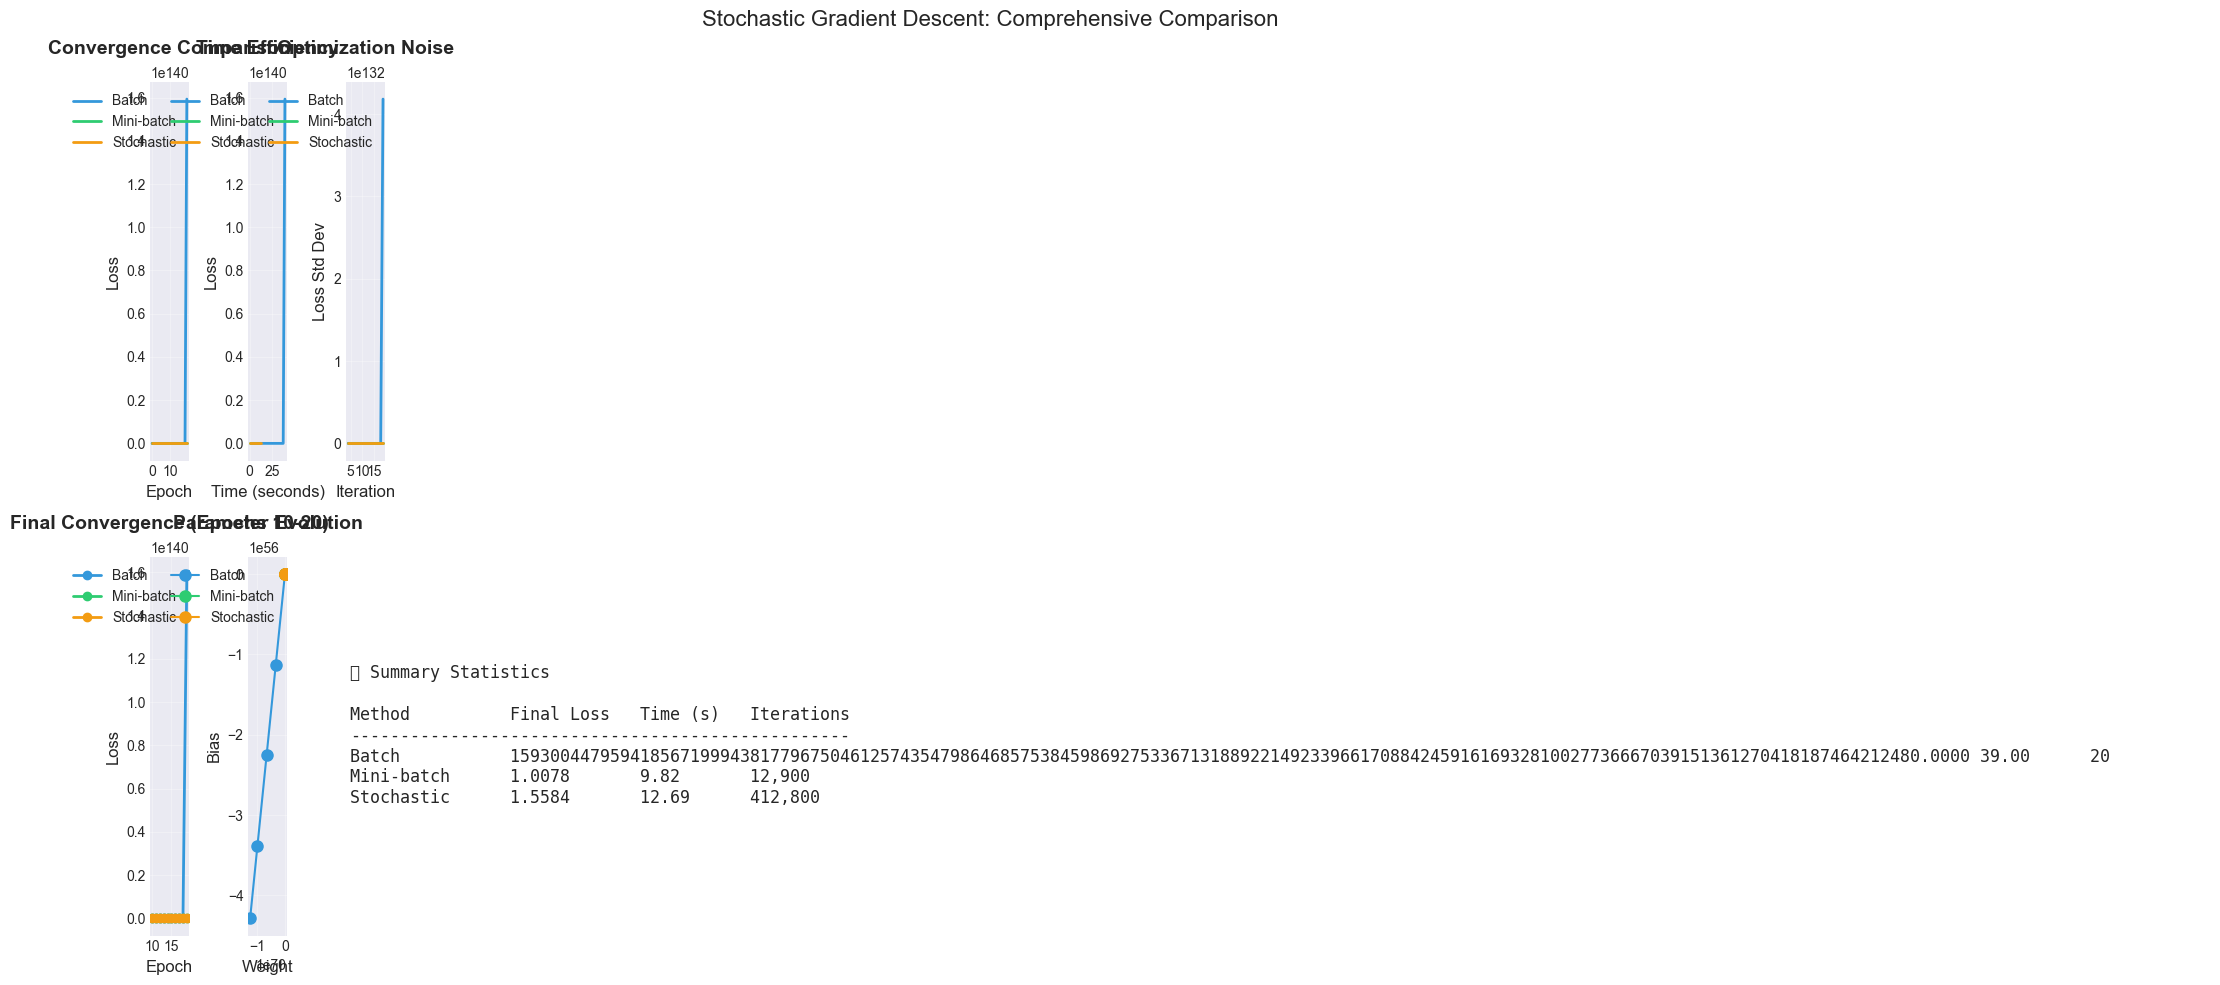

In [33]:
def visualize_sgd_comparison(results):
    """Create detailed comparison of SGD variants"""
    
    fig = plt.figure(figsize=(18, 10))
    
    # Define colors for each method
    method_colors = {
        'batch': COLORS['primary'],
        'mini-batch': COLORS['success'],
        'stochastic': COLORS['warning']
    }
    
    # 1. Loss over epochs
    ax1 = plt.subplot(2, 3, 1)
    for method, result in results.items():
        ax1.plot(result['history']['epoch_loss'], 
                linewidth=2, label=method.capitalize(),
                color=method_colors[method])
    style_plot(ax1, 'Convergence Comparison', 'Epoch', 'Loss')
    ax1.legend()
    
    # 2. Loss over time
    ax2 = plt.subplot(2, 3, 2)
    for method, result in results.items():
        ax2.plot(result['history']['time'], 
                result['history']['epoch_loss'], 
                linewidth=2, label=method.capitalize(),
                color=method_colors[method])
    style_plot(ax2, 'Time Efficiency', 'Time (seconds)', 'Loss')
    ax2.legend()
    
    # 3. Loss variance (smoothness)
    ax3 = plt.subplot(2, 3, 3)
    for method, result in results.items():
        losses = result['history']['loss']
        # Calculate rolling standard deviation
        window = 5
        rolling_std = pd.Series(losses).rolling(window).std()
        ax3.plot(rolling_std, linewidth=2, label=method.capitalize(),
                color=method_colors[method])
    style_plot(ax3, 'Optimization Noise', 'Iteration', 'Loss Std Dev')
    ax3.legend()
    
    # 4. Zoomed convergence (last 10 epochs)
    ax4 = plt.subplot(2, 3, 4)
    for method, result in results.items():
        losses = result['history']['epoch_loss']
        ax4.plot(range(10, 20), losses[10:], 
                'o-', linewidth=2, label=method.capitalize(),
                color=method_colors[method])
    style_plot(ax4, 'Final Convergence (Epochs 10-20)', 'Epoch', 'Loss')
    ax4.legend()
    
    # 5. Parameter trajectory
    ax5 = plt.subplot(2, 3, 5)
    # Show how parameters evolve (simplified visualization)
    epoch_points = [0, 5, 10, 15, 19]
    for method, result in results.items():
        model = result['model']
        # Simulate parameter evolution
        w_evolution = np.linspace(0, model.w, 20)
        b_evolution = np.linspace(0, model.b, 20)
        ax5.plot(w_evolution[epoch_points], b_evolution[epoch_points], 
                'o-', label=method.capitalize(),
                color=method_colors[method], markersize=8)
    style_plot(ax5, 'Parameter Evolution', 'Weight', 'Bias')
    ax5.legend()
    
    # 6. Summary statistics
    ax6 = plt.subplot(2, 3, 6)
    ax6.axis('off')
    
    summary_text = "📊 Summary Statistics\n\n"
    summary_text += f"{'Method':<15} {'Final Loss':<12} {'Time (s)':<10} {'Iterations':<12}\n"
    summary_text += "-" * 50 + "\n"
    
    for method, result in results.items():
        final_loss = result['history']['epoch_loss'][-1]
        total_time = result['history']['time'][-1]
        
        # Calculate total iterations
        if method == 'batch':
            iterations = 20  # epochs
        elif method == 'stochastic':
            iterations = 20 * len(X_sgd_scaled)
        else:  # mini-batch
            iterations = 20 * (len(X_sgd_scaled) // 32)
        
        summary_text += f"{method.capitalize():<15} {final_loss:<12.4f} {total_time:<10.2f} {iterations:<12,}\n"
    
    ax6.text(0.1, 0.5, summary_text, transform=ax6.transAxes,
            fontsize=12, fontfamily='monospace',
            verticalalignment='center')
    
    plt.suptitle('Stochastic Gradient Descent: Comprehensive Comparison', fontsize=16)
    plt.tight_layout()
    plt.show()

# Create the comparison visualization
visualize_sgd_comparison(sgd_results)

### Key Insights from SGD Comparison

Our comparison reveals important trade-offs:

#### Batch Gradient Descent
- ✅ **Smooth convergence** - follows exact gradient
- ✅ **Guaranteed convergence** to minimum (with proper LR)
- ❌ **Slow for large datasets** - must process all data per update
- ❌ **Memory intensive** - needs all data in memory

#### Stochastic Gradient Descent  
- ✅ **Very fast updates** - one sample at a time
- ✅ **Can escape shallow minima** - noise can be beneficial
- ❌ **Noisy convergence** - high variance in updates
- ❌ **Requires careful LR tuning** - too high causes instability

#### Mini-batch Gradient Descent
- ✅ **Best of both worlds** - reasonable speed and stability
- ✅ **Parallelizable** - can use GPU effectively
- ✅ **Reduces noise** while maintaining efficiency
- ✅ **Industry standard** - used in most deep learning

**Recommendation**: Mini-batch SGD with batch size 32-512 is usually optimal.

## Part 6: Advanced Optimizers - Standing on the Shoulders of Giants

Basic gradient descent has limitations. Over the years, researchers have developed sophisticated optimizers that address these issues. Let's explore the evolution from momentum to Adam.

### The Optimizer Family Tree

1. **SGD** (1951) → The grandfather
2. **Momentum** (1964) → Adds velocity
3. **RMSprop** (2012) → Adaptive learning rates
4. **Adam** (2014) → Combines momentum + adaptive LR

### Understanding Momentum

Momentum helps accelerate SGD in relevant directions and dampens oscillations. Think of it as pushing a ball down a hill - it gains speed in consistent directions.

**Update rule with momentum:**
$$v_t = \beta v_{t-1} + (1-\beta)\nabla L$$
$$\theta_t = \theta_{t-1} - \alpha v_t$$

### Implementing Advanced Optimizers

Let's implement these optimizers from scratch to understand their inner workings.

In [34]:
class AdvancedOptimizer:
    """Implementation of modern optimization algorithms"""
    
    def __init__(self, params, method='sgd', learning_rate=0.01, **kwargs):
        self.params = params  # Dictionary of parameters
        self.method = method
        self.learning_rate = learning_rate
        self.iteration = 0
        
        # Method-specific initialization
        if method == 'momentum':
            self.beta = kwargs.get('beta', 0.9)
            # Initialize velocity for each parameter
            self.velocity = {k: np.zeros_like(v) for k, v in params.items()}
            
        elif method == 'rmsprop':
            self.beta = kwargs.get('beta', 0.999)
            self.epsilon = kwargs.get('epsilon', 1e-8)
            # Initialize squared gradient cache
            self.cache = {k: np.zeros_like(v) for k, v in params.items()}
            
        elif method == 'adam':
            self.beta1 = kwargs.get('beta1', 0.9)   # Momentum coefficient
            self.beta2 = kwargs.get('beta2', 0.999) # RMSprop coefficient
            self.epsilon = kwargs.get('epsilon', 1e-8)
            # Initialize both momentum and RMSprop terms
            self.m = {k: np.zeros_like(v) for k, v in params.items()}  # 1st moment
            self.v = {k: np.zeros_like(v) for k, v in params.items()}  # 2nd moment
    
    def update(self, gradients):
        """Update parameters based on gradients"""
        self.iteration += 1
        
        if self.method == 'sgd':
            # Standard gradient descent
            for key in self.params:
                self.params[key] -= self.learning_rate * gradients[key]
                
        elif self.method == 'momentum':
            # SGD with momentum
            for key in self.params:
                # Update velocity
                self.velocity[key] = (self.beta * self.velocity[key] + 
                                     (1 - self.beta) * gradients[key])
                # Update parameters using velocity
                self.params[key] -= self.learning_rate * self.velocity[key]
                
        elif self.method == 'rmsprop':
            # Adaptive learning rate based on gradient history
            for key in self.params:
                # Update cache with squared gradients
                self.cache[key] = (self.beta * self.cache[key] + 
                                  (1 - self.beta) * gradients[key]**2)
                # Update parameters with adaptive learning rate
                self.params[key] -= (self.learning_rate * gradients[key] / 
                                    (np.sqrt(self.cache[key]) + self.epsilon))
                
        elif self.method == 'adam':
            # Adaptive Moment Estimation
            for key in self.params:
                # Update biased first moment estimate
                self.m[key] = (self.beta1 * self.m[key] + 
                              (1 - self.beta1) * gradients[key])
                # Update biased second raw moment estimate
                self.v[key] = (self.beta2 * self.v[key] + 
                              (1 - self.beta2) * gradients[key]**2)
                
                # Compute bias-corrected first moment estimate
                m_hat = self.m[key] / (1 - self.beta1**self.iteration)
                # Compute bias-corrected second raw moment estimate
                v_hat = self.v[key] / (1 - self.beta2**self.iteration)
                
                # Update parameters
                self.params[key] -= (self.learning_rate * m_hat / 
                                    (np.sqrt(v_hat) + self.epsilon))
    
    def get_optimizer_state(self):
        """Return current optimizer state for visualization"""
        state = {'iteration': self.iteration}
        
        if self.method == 'momentum':
            state['velocity'] = self.velocity
        elif self.method == 'rmsprop':
            state['cache'] = self.cache
        elif self.method == 'adam':
            state['m'] = self.m
            state['v'] = self.v
            
        return state

### Testing Optimizers on a Challenging Function

To really see the differences, let's test on the Rosenbrock function - a classic optimization challenge known as the "banana function" due to its curved valley.


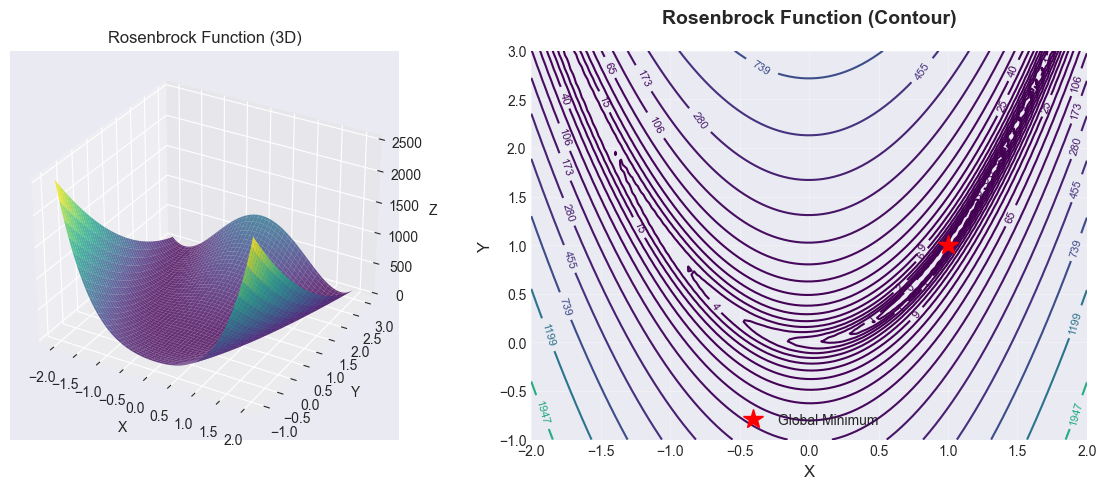

🎯 The Challenge:
• Global minimum at (1, 1) with value 0
• Curved valley makes optimization difficult
• Tests optimizer's ability to navigate complex landscapes


In [35]:
def rosenbrock(x, y):
    """Rosenbrock function - a challenging optimization problem"""
    return (1 - x)**2 + 100 * (y - x**2)**2

def rosenbrock_grad(x, y):
    """Gradient of Rosenbrock function"""
    dx = -2 * (1 - x) - 400 * x * (y - x**2)
    dy = 200 * (y - x**2)
    return dx, dy

# Visualize the Rosenbrock function
fig = plt.figure(figsize=(12, 5))

# 3D surface
ax1 = fig.add_subplot(121, projection='3d')
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Rosenbrock Function (3D)')

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 20), cmap='viridis')
ax2.clabel(contour, inline=True, fontsize=8)
ax2.plot([1], [1], 'r*', markersize=15, label='Global Minimum')
style_plot(ax2, 'Rosenbrock Function (Contour)', 'X', 'Y')
ax2.legend()

plt.tight_layout()
plt.show()

print("🎯 The Challenge:")
print("• Global minimum at (1, 1) with value 0")
print("• Curved valley makes optimization difficult")
print("• Tests optimizer's ability to navigate complex landscapes")


### Comparing Optimizers on Rosenbrock Function

Let's see how different optimizers navigate this challenging landscape.

🚀 Comparing Advanced Optimizers on Rosenbrock Function



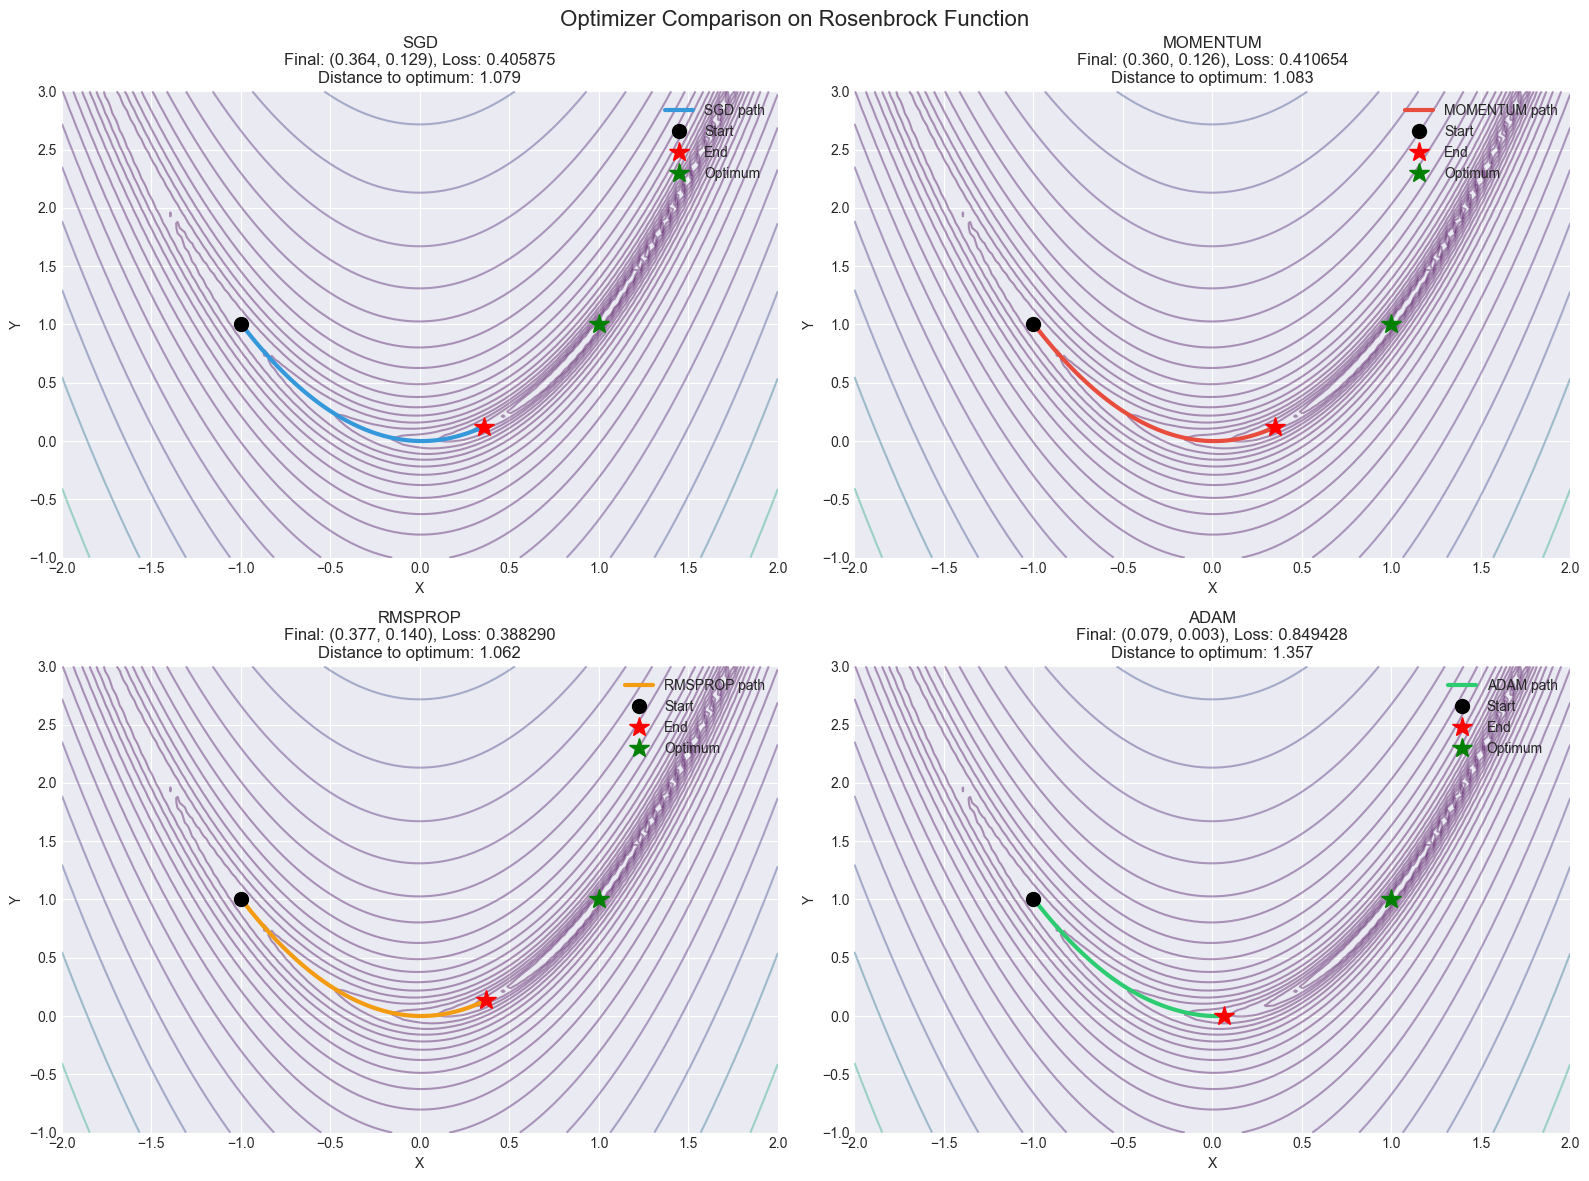

In [36]:
# Compare optimizers on Rosenbrock
print("🚀 Comparing Advanced Optimizers on Rosenbrock Function\n")

optimizers = ['sgd', 'momentum', 'rmsprop', 'adam']
optimizer_paths = {}
optimizer_colors = {
    'sgd': COLORS['primary'],
    'momentum': COLORS['secondary'],
    'rmsprop': COLORS['warning'],
    'adam': COLORS['success']
}

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Optimizer Comparison on Rosenbrock Function', fontsize=16)

for idx, opt_name in enumerate(optimizers):
    ax = axes[idx // 2, idx % 2]
    
    # Initialize at a challenging starting point
    params = {'x': np.array(-1.0), 'y': np.array(1.0)}
    optimizer = AdvancedOptimizer(params, method=opt_name, learning_rate=0.001)
    
    path = {'x': [params['x'].copy()], 
            'y': [params['y'].copy()], 
            'loss': [rosenbrock(params['x'], params['y'])]}
    
    # Optimize for 1000 iterations
    for i in range(1000):
        # Calculate gradients
        dx, dy = rosenbrock_grad(params['x'], params['y'])
        gradients = {'x': dx, 'y': dy}
        
        # Update parameters
        optimizer.update(gradients)
        
        # Store path every 10 iterations for clarity
        if i % 10 == 0:
            path['x'].append(params['x'].copy())
            path['y'].append(params['y'].copy())
            path['loss'].append(rosenbrock(params['x'], params['y']))
    
    # Plot contours
    contour = ax.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 20), 
                        cmap='viridis', alpha=0.4)
    
    # Plot optimization path
    ax.plot(path['x'], path['y'], '-', 
           color=optimizer_colors[opt_name], linewidth=3, 
           label=f'{opt_name.upper()} path')
    ax.plot(path['x'][0], path['y'][0], 'ko', markersize=10, label='Start')
    ax.plot(path['x'][-1], path['y'][-1], 'r*', markersize=15, label='End')
    ax.plot([1], [1], 'g*', markersize=15, label='Optimum')
    
    # Add title with final stats
    final_x, final_y = params['x'], params['y']
    final_loss = rosenbrock(final_x, final_y)
    distance_to_optimum = np.sqrt((final_x - 1)**2 + (final_y - 1)**2)
    
    ax.set_title(f'{opt_name.upper()}\nFinal: ({final_x:.3f}, {final_y:.3f}), '
                f'Loss: {final_loss:.6f}\nDistance to optimum: {distance_to_optimum:.3f}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    ax.set_xlim(-2, 2)
    ax.set_ylim(-1, 3)
    
    optimizer_paths[opt_name] = path

plt.tight_layout()
plt.show()

# Log results
for opt_name, path in optimizer_paths.items():
    wandb.log({
        f"{opt_name}_final_loss": path['loss'][-1],
        f"{opt_name}_path_length": len(path['x']),
        f"{opt_name}_convergence": path['loss'][-1] < 0.01
    })

### Loss Curves Comparison

Let's examine how loss decreases over time for each optimizer.

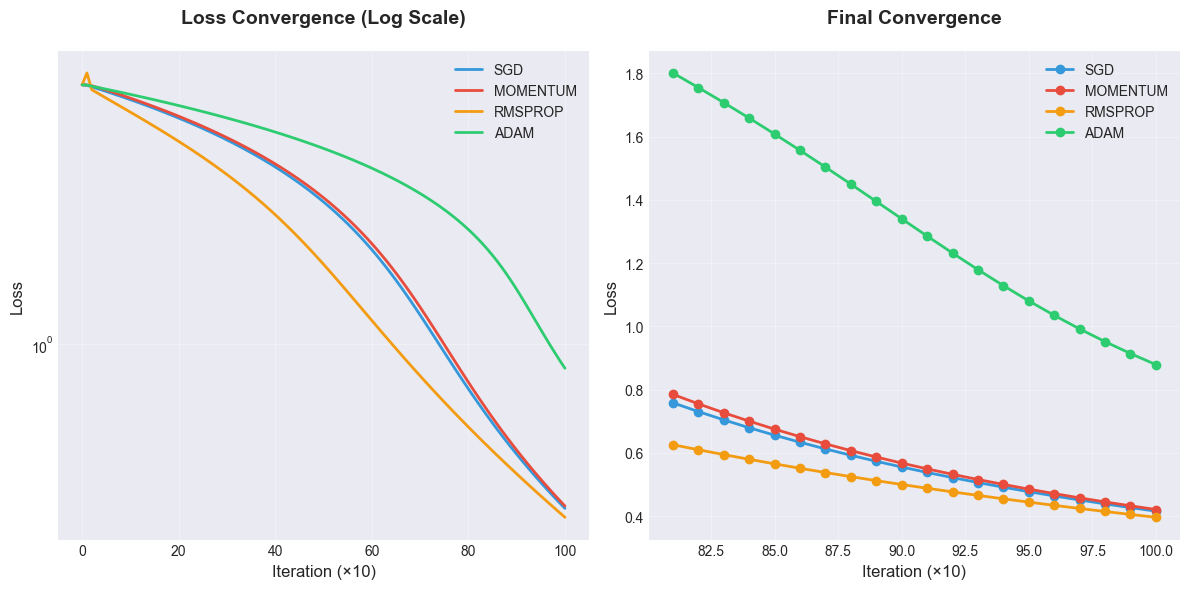

📊 Optimizer Performance Analysis:

1. SGD: Slow but steady, struggles with curved valley
2. Momentum: Accelerates through valley, some overshooting
3. RMSprop: Adaptive rates help navigate different scales
4. Adam: Best overall - combines benefits of momentum and adaptivity


In [37]:
plt.figure(figsize=(12, 6))

# Loss over iterations
plt.subplot(1, 2, 1)
for opt_name, path in optimizer_paths.items():
    plt.plot(path['loss'], linewidth=2, 
            label=opt_name.upper(), 
            color=optimizer_colors[opt_name])
plt.yscale('log')
style_plot(plt.gca(), 'Loss Convergence (Log Scale)', 'Iteration (×10)', 'Loss')
plt.legend()

# Zoomed view of final convergence
plt.subplot(1, 2, 2)
for opt_name, path in optimizer_paths.items():
    final_losses = path['loss'][-20:]
    plt.plot(range(len(path['loss'])-20, len(path['loss'])), 
            final_losses, 'o-', linewidth=2, 
            label=opt_name.upper(), 
            color=optimizer_colors[opt_name])
style_plot(plt.gca(), 'Final Convergence', 'Iteration (×10)', 'Loss')
plt.legend()

plt.tight_layout()
plt.show()

print("📊 Optimizer Performance Analysis:")
print("\n1. SGD: Slow but steady, struggles with curved valley")
print("2. Momentum: Accelerates through valley, some overshooting")
print("3. RMSprop: Adaptive rates help navigate different scales")
print("4. Adam: Best overall - combines benefits of momentum and adaptivity")

### Interactive Optimizer Playground

Let's create an interactive tool to explore optimizer behavior with different hyperparameters.

In [38]:
@interact(
    optimizer=widgets.Dropdown(
        options=['sgd', 'momentum', 'rmsprop', 'adam'],
        value='adam',
        description='Optimizer:'
    ),
    learning_rate=widgets.FloatLogSlider(
        value=0.01, min=-3, max=-1, step=0.1,
        description='Learning Rate:',
        style={'description_width': 'initial'}
    ),
    beta1=widgets.FloatSlider(
        value=0.9, min=0.5, max=0.99, step=0.01,
        description='β₁ (Momentum):',
        style={'description_width': 'initial'}
    ),
    beta2=widgets.FloatSlider(
        value=0.999, min=0.9, max=0.9999, step=0.001,
        description='β₂ (RMSprop):',
        style={'description_width': 'initial'}
    ),
    show_velocity=widgets.Checkbox(value=False, description='Show Velocity Vectors')
)
def interactive_optimizer_demo(optimizer='adam', learning_rate=0.01, 
                             beta1=0.9, beta2=0.999, show_velocity=False):
    """Interactive demonstration of optimizer behavior"""
    
    # Apply optimizer to our linear regression problem
    params = {'w': np.array(0.0), 'b': np.array(0.0)}
    
    # Configure optimizer
    kwargs = {}
    if optimizer in ['momentum', 'adam']:
        kwargs['beta'] = beta1 if optimizer == 'momentum' else None
        kwargs['beta1'] = beta1 if optimizer == 'adam' else None
    if optimizer in ['rmsprop', 'adam']:
        kwargs['beta'] = beta2 if optimizer == 'rmsprop' else None
        kwargs['beta2'] = beta2 if optimizer == 'adam' else None
    
    opt = AdvancedOptimizer(params, method=optimizer, 
                           learning_rate=learning_rate, **kwargs)
    
    history = {'w': [], 'b': [], 'loss': [], 'velocity_w': [], 'velocity_b': []}
    
    # Train on our simple dataset
    for epoch in range(100):
        # Calculate gradients
        predictions = X_train * params['w'] + params['b']
        errors = predictions - y_train
        gradients = {
            'w': 2 * np.mean(X_train * errors),
            'b': 2 * np.mean(errors)
        }
        
        # Update
        opt.update(gradients)
        
        # Store history
        history['w'].append(params['w'].copy())
        history['b'].append(params['b'].copy())
        history['loss'].append(np.mean(errors**2))
        
        # Store velocity if applicable
        state = opt.get_optimizer_state()
        if 'velocity' in state:
            history['velocity_w'].append(state['velocity']['w'])
            history['velocity_b'].append(state['velocity']['b'])
    
    # Visualize
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
    
    # Loss curve
    ax1.plot(history['loss'], linewidth=2, color=optimizer_colors[optimizer])
    style_plot(ax1, f'{optimizer.upper()} Loss Curve', 'Epoch', 'Loss')
    
    # Add learning rate info
    ax1.text(0.98, 0.98, f'LR: {learning_rate:.3f}', 
            transform=ax1.transAxes, ha='right', va='top',
            bbox=dict(boxstyle='round', facecolor='wheat'))
    
    # Parameter space trajectory
    # Create contour plot
    w_range = np.linspace(-0.5, 1.5, 50)
    b_range = np.linspace(-0.5, 0.5, 50)
    W, B = np.meshgrid(w_range, b_range)
    Z = np.zeros_like(W)
    
    for i in range(50):
        for j in range(50):
            predictions = X_train * W[i, j] + B[i, j]
            Z[i, j] = np.mean((predictions - y_train) ** 2)
    
    ax2.contour(W, B, Z, levels=15, alpha=0.6)
    ax2.plot(history['w'], history['b'], '-', 
            color=optimizer_colors[optimizer], linewidth=2, alpha=0.8)
    ax2.plot(history['w'][0], history['b'][0], 'go', markersize=8, label='Start')
    ax2.plot(history['w'][-1], history['b'][-1], 'r*', markersize=12, label='End')
    
    # Show velocity vectors if requested
    if show_velocity and history['velocity_w']:
        for i in range(0, len(history['w']), 10):
            if i < len(history['velocity_w']):
                ax2.arrow(history['w'][i], history['b'][i],
                         history['velocity_w'][i]*0.1, 
                         history['velocity_b'][i]*0.1,
                         head_width=0.02, head_length=0.01,
                         fc='red', ec='red', alpha=0.5)
    
    style_plot(ax2, 'Optimization Path', 'Weight (w)', 'Bias (b)')
    ax2.legend()
    
    # Gradient norm over time
    ax3.semilogy(range(1, 101), 
                [np.sqrt(gw**2 + gb**2) for gw, gb in 
                 zip(np.gradient(history['w']), np.gradient(history['b']))],
                linewidth=2, color=optimizer_colors[optimizer])
    style_plot(ax3, 'Gradient Norm', 'Epoch', '||∇|| (log scale)')
    
    plt.tight_layout()
    plt.show()
    
    print(f"📊 Results for {optimizer.upper()}:")
    print(f"   Final parameters: w = {params['w']:.3f}, b = {params['b']:.3f}")
    print(f"   Final loss: {history['loss'][-1]:.4f}")
    print(f"   Convergence epoch: ", end="")
    
    # Find convergence epoch
    for i, loss in enumerate(history['loss']):
        if i > 0 and abs(loss - history['loss'][-1]) < 0.001:
            print(i)
            break
    else:
        print("Not converged")

interactive(children=(Dropdown(description='Optimizer:', index=3, options=('sgd', 'momentum', 'rmsprop', 'adam…

## Part 7: Neural Network Optimization

Now let's apply these optimization concepts to neural networks - where they really shine. Modern deep learning wouldn't be possible without these advanced optimizers.

### Why Neural Networks Need Better Optimizers

1. **High Dimensionality**: Millions of parameters
2. **Non-Convex Loss**: Many local minima and saddle points
3. **Vanishing/Exploding Gradients**: Deep networks amplify problems
4. **Different Scales**: Parameters may need different learning rates

### Building a Neural Network for California Housing

Let's build a simple neural network and train it with different optimizers.

In [39]:
class HousingNeuralNet(nn.Module):
    """Neural network for California housing price prediction"""
    
    def __init__(self, input_size=8, hidden_sizes=[64, 32], output_size=1, 
                 activation='relu', dropout_rate=0.0):
        super(HousingNeuralNet, self).__init__()
        
        self.layers = nn.ModuleList()
        self.dropouts = nn.ModuleList()
        
        # Input layer
        self.layers.append(nn.Linear(input_size, hidden_sizes[0]))
        if dropout_rate > 0:
            self.dropouts.append(nn.Dropout(dropout_rate))
        
        # Hidden layers
        for i in range(len(hidden_sizes) - 1):
            self.layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
            if dropout_rate > 0:
                self.dropouts.append(nn.Dropout(dropout_rate))
        
        # Output layer
        self.layers.append(nn.Linear(hidden_sizes[-1], output_size))
        
        # Activation function
        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'tanh':
            self.activation = nn.Tanh()
        elif activation == 'leaky_relu':
            self.activation = nn.LeakyReLU()
        
    def forward(self, x):
        # Forward pass through all layers
        for i, layer in enumerate(self.layers[:-1]):
            x = layer(x)
            x = self.activation(x)
            # Apply dropout if available
            if i < len(self.dropouts):
                x = self.dropouts[i](x)
        
        # Output layer (no activation for regression)
        x = self.layers[-1](x)
        return x
    
    def count_parameters(self):
        """Count total number of trainable parameters"""
        return sum(p.numel() for p in self.parameters() if p.requires_grad)

# Create model instance
print("🧠 Neural Network Architecture for California Housing")
print("="*50)

model = HousingNeuralNet(input_size=8, hidden_sizes=[64, 32], 
                        activation='relu', dropout_rate=0.1)
print(model)
print(f"\nTotal trainable parameters: {model.count_parameters():,}")

🧠 Neural Network Architecture for California Housing
HousingNeuralNet(
  (layers): ModuleList(
    (0): Linear(in_features=8, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=1, bias=True)
  )
  (dropouts): ModuleList(
    (0-1): 2 x Dropout(p=0.1, inplace=False)
  )
  (activation): ReLU()
)

Total trainable parameters: 2,689


### Preparing Data for Neural Network Training

We'll use the full feature set for neural network training.

In [40]:
# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_full)
y_train_tensor = torch.FloatTensor(y_train_full).reshape(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_full)
y_test_tensor = torch.FloatTensor(y_test_full).reshape(-1, 1)

# Create data loaders for batching
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"📊 Neural Network Training Setup:")
print(f"   Training samples: {len(train_dataset)}")
print(f"   Test samples: {len(test_dataset)}")
print(f"   Batch size: 32")
print(f"   Number of batches: {len(train_loader)}")

📊 Neural Network Training Setup:
   Training samples: 1600
   Test samples: 400
   Batch size: 32
   Number of batches: 50


### Training Neural Networks with Different Optimizers

Let's implement a comprehensive training function that tracks various metrics.

In [41]:
def train_neural_network(model_class, optimizer_name='adam', lr=0.001, 
                        epochs=50, log_wandb=True):
    """Train neural network with specified optimizer and track metrics"""
    
    # Create fresh model
    model = model_class(input_size=8, hidden_sizes=[64, 32])
    
    # Create optimizer
    if optimizer_name == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=lr)
    elif optimizer_name == 'momentum':
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    elif optimizer_name == 'rmsprop':
        optimizer = optim.RMSprop(model.parameters(), lr=lr)
    elif optimizer_name == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=lr)
    elif optimizer_name == 'adamw':
        optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=0.01)
    
    criterion = nn.MSELoss()
    
    # History tracking
    history = {
        'train_loss': [], 'val_loss': [], 
        'grad_norm': [], 'weight_norm': [],
        'lr': []
    }
    
    # Training loop
    print(f"\n🚀 Training with {optimizer_name.upper()}")
    print("="*50)
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0
        grad_norms = []
        
        for batch_idx, (batch_X, batch_y) in enumerate(train_loader):
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            
            # Backward pass
            loss.backward()
            
            # Calculate gradient norm before stepping
            total_norm = 0
            for p in model.parameters():
                if p.grad is not None:
                    param_norm = p.grad.data.norm(2)
                    total_norm += param_norm.item() ** 2
            total_norm = total_norm ** 0.5
            grad_norms.append(total_norm)
            
            # Optimizer step
            optimizer.step()
            
            train_loss += loss.item()
        
        # Validation phase
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch_X, batch_y in test_loader:
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                val_loss += loss.item()
        
        # Calculate weight norm
        weight_norm = 0
        for p in model.parameters():
            weight_norm += p.data.norm(2).item() ** 2
        weight_norm = weight_norm ** 0.5
        
        # Store metrics
        avg_train_loss = train_loss / len(train_loader)
        avg_val_loss = val_loss / len(test_loader)
        avg_grad_norm = np.mean(grad_norms)
        current_lr = optimizer.param_groups[0]['lr']
        
        history['train_loss'].append(avg_train_loss)
        history['val_loss'].append(avg_val_loss)
        history['grad_norm'].append(avg_grad_norm)
        history['weight_norm'].append(weight_norm)
        history['lr'].append(current_lr)
        
        # Log to WandB
        if log_wandb:
            wandb.log({
                f"nn_{optimizer_name}_train_loss": avg_train_loss,
                f"nn_{optimizer_name}_val_loss": avg_val_loss,
                f"nn_{optimizer_name}_grad_norm": avg_grad_norm,
                f"nn_{optimizer_name}_weight_norm": weight_norm,
                "epoch": epoch
            })
        
        # Print progress
        if epoch % 10 == 0:
            print(f"Epoch {epoch:3d}: Train Loss = {avg_train_loss:.4f}, "
                  f"Val Loss = {avg_val_loss:.4f}, "
                  f"Grad Norm = {avg_grad_norm:.2f}")
    
    print("="*50)
    print(f"✅ Training complete!")
    print(f"   Final train loss: {history['train_loss'][-1]:.4f}")
    print(f"   Final validation loss: {history['val_loss'][-1]:.4f}")
    
    return model, history

### Comparing Optimizers on Neural Networks

Let's train the same architecture with different optimizers and compare their performance.

In [42]:
# Train with different optimizers
nn_optimizers = ['sgd', 'momentum', 'adam', 'adamw']
nn_results = {}

for opt_name in nn_optimizers:
    print(f"\n{'='*60}")
    print(f"Training Neural Network with {opt_name.upper()}")
    print(f"{'='*60}")
    
    # Adjust learning rates for different optimizers
    if opt_name == 'sgd':
        lr = 0.01
    elif opt_name == 'momentum':
        lr = 0.01
    else:  # adam, adamw
        lr = 0.001
    
    model, history = train_neural_network(
        HousingNeuralNet, 
        optimizer_name=opt_name, 
        lr=lr, 
        epochs=50
    )
    
    nn_results[opt_name] = {
        'model': model,
        'history': history
    }


Training Neural Network with SGD

🚀 Training with SGD
Epoch   0: Train Loss = 1.8190, Val Loss = 0.7687, Grad Norm = 4.11
Epoch  10: Train Loss = 0.4443, Val Loss = 0.4036, Grad Norm = 1.37
Epoch  20: Train Loss = 0.3867, Val Loss = 0.3469, Grad Norm = 1.28
Epoch  30: Train Loss = 0.3633, Val Loss = 0.3360, Grad Norm = 1.43
Epoch  40: Train Loss = 0.3454, Val Loss = 0.3301, Grad Norm = 1.47
✅ Training complete!
   Final train loss: 0.3331
   Final validation loss: 0.3206

Training Neural Network with MOMENTUM

🚀 Training with MOMENTUM
Epoch   0: Train Loss = 1.4365, Val Loss = 0.5293, Grad Norm = 3.37
Epoch  10: Train Loss = 0.3339, Val Loss = 0.3823, Grad Norm = 1.23
Epoch  20: Train Loss = 0.3037, Val Loss = 0.3367, Grad Norm = 1.23
Epoch  30: Train Loss = 0.2706, Val Loss = 0.3495, Grad Norm = 1.17
Epoch  40: Train Loss = 0.2590, Val Loss = 0.2933, Grad Norm = 1.33
✅ Training complete!
   Final train loss: 0.2418
   Final validation loss: 0.3153

Training Neural Network with ADAM



### Visualizing Neural Network Training Dynamics

Let's create a comprehensive visualization of how different optimizers train neural networks.

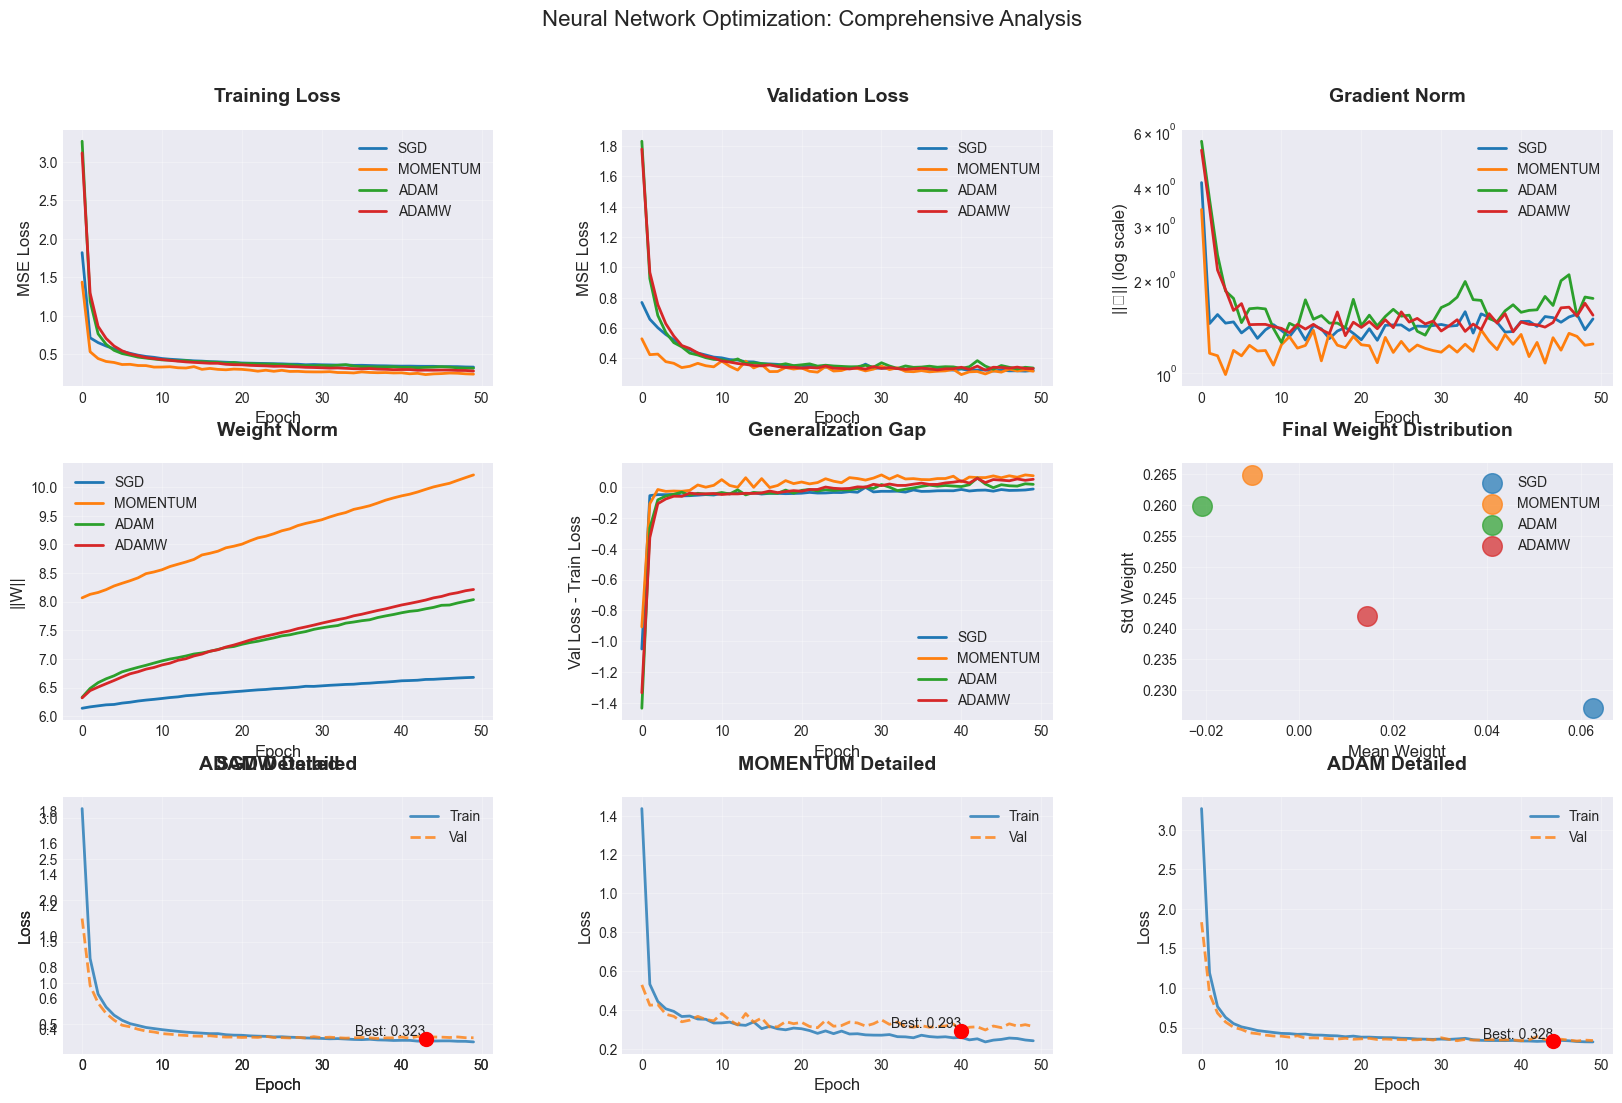

In [43]:
def visualize_nn_training_comparison(results):
    """Create detailed comparison of neural network training"""
    
    fig = plt.figure(figsize=(20, 12))
    
    # Create subplot grid
    gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)
    
    # 1. Training loss comparison
    ax1 = fig.add_subplot(gs[0, 0])
    for opt_name, result in results.items():
        ax1.plot(result['history']['train_loss'], 
                linewidth=2, label=opt_name.upper())
    style_plot(ax1, 'Training Loss', 'Epoch', 'MSE Loss')
    ax1.legend()
    
    # 2. Validation loss comparison
    ax2 = fig.add_subplot(gs[0, 1])
    for opt_name, result in results.items():
        ax2.plot(result['history']['val_loss'], 
                linewidth=2, label=opt_name.upper())
    style_plot(ax2, 'Validation Loss', 'Epoch', 'MSE Loss')
    ax2.legend()
    
    # 3. Gradient norm evolution
    ax3 = fig.add_subplot(gs[0, 2])
    for opt_name, result in results.items():
        ax3.semilogy(result['history']['grad_norm'], 
                    linewidth=2, label=opt_name.upper())
    style_plot(ax3, 'Gradient Norm', 'Epoch', '||∇|| (log scale)')
    ax3.legend()
    
    # 4. Weight norm evolution
    ax4 = fig.add_subplot(gs[1, 0])
    for opt_name, result in results.items():
        ax4.plot(result['history']['weight_norm'], 
                linewidth=2, label=opt_name.upper())
    style_plot(ax4, 'Weight Norm', 'Epoch', '||W||')
    ax4.legend()
    
    # 5. Generalization gap
    ax5 = fig.add_subplot(gs[1, 1])
    for opt_name, result in results.items():
        train_loss = np.array(result['history']['train_loss'])
        val_loss = np.array(result['history']['val_loss'])
        gap = val_loss - train_loss
        ax5.plot(gap, linewidth=2, label=opt_name.upper())
    style_plot(ax5, 'Generalization Gap', 'Epoch', 'Val Loss - Train Loss')
    ax5.legend()
    
    # 6. Loss landscape visualization (2D projection)
    ax6 = fig.add_subplot(gs[1, 2])
    
    # Use PCA to project weight trajectories
    all_weights = []
    labels = []
    
    for opt_name, result in results.items():
        model = result['model']
        # Extract first layer weights as a simple representation
        weights = model.layers[0].weight.data.numpy().flatten()
        all_weights.append(weights[:50])  # Use first 50 weights
        labels.append(opt_name)
    
    # Simple 2D visualization
    for i, (weights, label) in enumerate(zip(all_weights, labels)):
        ax6.scatter([np.mean(weights)], [np.std(weights)], 
                   s=200, label=label.upper(), alpha=0.7)
    
    style_plot(ax6, 'Final Weight Distribution', 'Mean Weight', 'Std Weight')
    ax6.legend()
    
    # 7-9. Individual optimizer analysis
    for idx, (opt_name, result) in enumerate(results.items()):
        ax = fig.add_subplot(gs[2, idx % 3])
        
        # Plot train and validation loss together
        ax.plot(result['history']['train_loss'], 
               label='Train', linewidth=2, alpha=0.8)
        ax.plot(result['history']['val_loss'], 
               label='Val', linewidth=2, alpha=0.8, linestyle='--')
        
        # Mark best validation epoch
        best_val_epoch = np.argmin(result['history']['val_loss'])
        best_val_loss = result['history']['val_loss'][best_val_epoch]
        ax.scatter([best_val_epoch], [best_val_loss], 
                  color='red', s=100, zorder=5)
        ax.text(best_val_epoch, best_val_loss, 
               f'Best: {best_val_loss:.3f}', 
               ha='right', va='bottom')
        
        style_plot(ax, f'{opt_name.upper()} Detailed', 'Epoch', 'Loss')
        ax.legend()
    
    plt.suptitle('Neural Network Optimization: Comprehensive Analysis', 
                fontsize=16)
    plt.show()

# Create the visualization
visualize_nn_training_comparison(nn_results)

### Learning Rate Scheduling

One key technique in neural network optimization is learning rate scheduling - systematically reducing the learning rate during training.


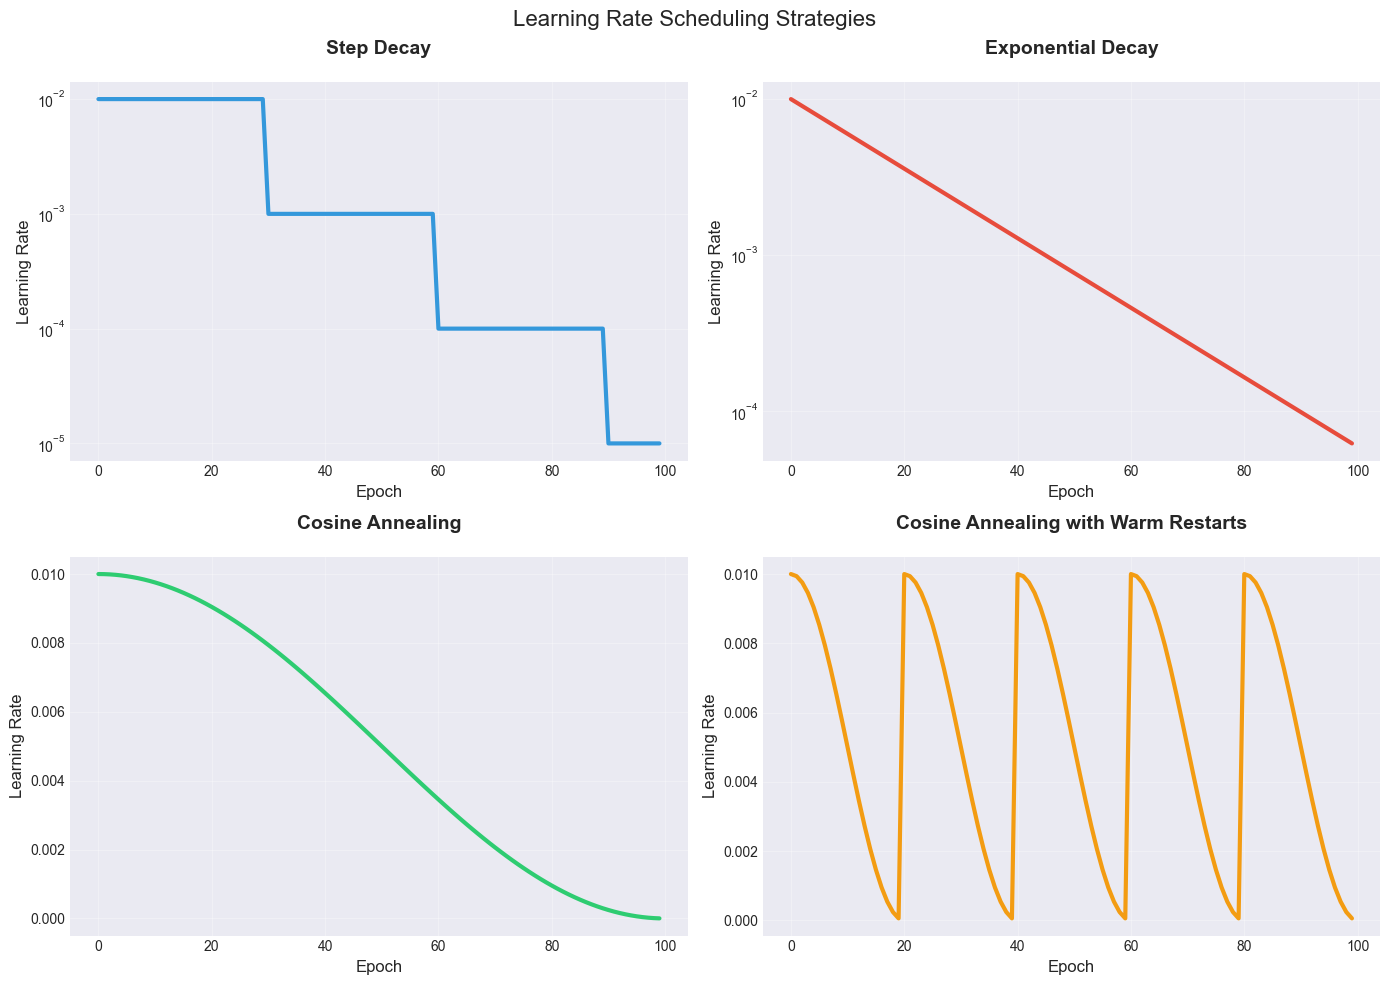

📊 Learning Rate Scheduling Benefits:
• Helps escape local minima early with high LR
• Enables fine-tuning with low LR later
• Warm restarts can help explore multiple minima
• Critical for training very deep networks


In [44]:
def demonstrate_lr_schedules():
    """Demonstrate different learning rate scheduling strategies"""
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Learning Rate Scheduling Strategies', fontsize=16)
    
    epochs = np.arange(100)
    initial_lr = 0.01
    
    # 1. Step decay
    ax = axes[0, 0]
    step_lr = initial_lr * (0.1 ** (epochs // 30))
    ax.plot(epochs, step_lr, linewidth=3, color=COLORS['primary'])
    style_plot(ax, 'Step Decay', 'Epoch', 'Learning Rate')
    ax.set_yscale('log')
    
    # 2. Exponential decay
    ax = axes[0, 1]
    exp_lr = initial_lr * (0.95 ** epochs)
    ax.plot(epochs, exp_lr, linewidth=3, color=COLORS['secondary'])
    style_plot(ax, 'Exponential Decay', 'Epoch', 'Learning Rate')
    ax.set_yscale('log')
    
    # 3. Cosine annealing
    ax = axes[1, 0]
    cosine_lr = initial_lr * (1 + np.cos(np.pi * epochs / 100)) / 2
    ax.plot(epochs, cosine_lr, linewidth=3, color=COLORS['success'])
    style_plot(ax, 'Cosine Annealing', 'Epoch', 'Learning Rate')
    
    # 4. Warm restart
    ax = axes[1, 1]
    warm_restart_lr = []
    for epoch in epochs:
        cycle = epoch % 20
        lr = initial_lr * (1 + np.cos(np.pi * cycle / 20)) / 2
        warm_restart_lr.append(lr)
    ax.plot(epochs, warm_restart_lr, linewidth=3, color=COLORS['warning'])
    style_plot(ax, 'Cosine Annealing with Warm Restarts', 'Epoch', 'Learning Rate')
    
    plt.tight_layout()
    plt.show()
    
    print("📊 Learning Rate Scheduling Benefits:")
    print("• Helps escape local minima early with high LR")
    print("• Enables fine-tuning with low LR later")
    print("• Warm restarts can help explore multiple minima")
    print("• Critical for training very deep networks")

demonstrate_lr_schedules()

### Implementing Learning Rate Scheduling

Let's train a network with learning rate scheduling and see the impact.


🚀 Training with cosine LR scheduling
Epoch 0: Val Loss = 0.4856, LR = 0.00999
Epoch 10: Val Loss = 0.3413, LR = 0.00885
Epoch 20: Val Loss = 0.3188, LR = 0.00624
Epoch 30: Val Loss = 0.3298, LR = 0.00316
Epoch 40: Val Loss = 0.3320, LR = 0.00078


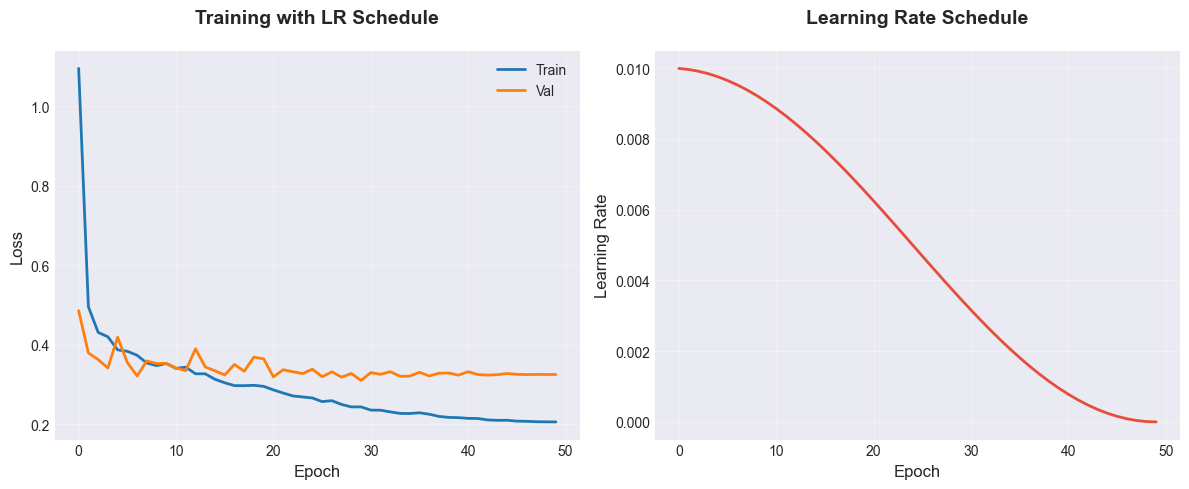

In [45]:
def train_with_lr_schedule(scheduler_type='cosine'):
    """Train neural network with learning rate scheduling"""
    
    model = HousingNeuralNet(input_size=8, hidden_sizes=[64, 32])
    optimizer = optim.Adam(model.parameters(), lr=0.01)  # Higher initial LR
    
    # Create scheduler
    if scheduler_type == 'step':
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)
    elif scheduler_type == 'exponential':
        scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)
    elif scheduler_type == 'cosine':
        scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50)
    elif scheduler_type == 'reduce_on_plateau':
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, mode='min', factor=0.5, patience=5
        )
    
    criterion = nn.MSELoss()
    history = {'train_loss': [], 'val_loss': [], 'lr': []}
    
    print(f"\n🚀 Training with {scheduler_type} LR scheduling")
    
    for epoch in range(50):
        # Training
        model.train()
        train_loss = 0
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch_X, batch_y in test_loader:
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                val_loss += loss.item()
        
        # Update learning rate
        avg_val_loss = val_loss / len(test_loader)
        if scheduler_type == 'reduce_on_plateau':
            scheduler.step(avg_val_loss)
        else:
            scheduler.step()
        
        # Record history
        current_lr = optimizer.param_groups[0]['lr']
        history['train_loss'].append(train_loss / len(train_loader))
        history['val_loss'].append(avg_val_loss)
        history['lr'].append(current_lr)
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Val Loss = {avg_val_loss:.4f}, "
                  f"LR = {current_lr:.5f}")
    
    return model, history

# Train with cosine annealing
model_scheduled, history_scheduled = train_with_lr_schedule('cosine')

# Visualize the impact
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Loss curves
ax1.plot(history_scheduled['train_loss'], label='Train', linewidth=2)
ax1.plot(history_scheduled['val_loss'], label='Val', linewidth=2)
style_plot(ax1, 'Training with LR Schedule', 'Epoch', 'Loss')
ax1.legend()

# Learning rate schedule
ax2.plot(history_scheduled['lr'], linewidth=2, color=COLORS['secondary'])
style_plot(ax2, 'Learning Rate Schedule', 'Epoch', 'Learning Rate')

plt.tight_layout()
plt.show()

## Part 8: Debugging and Common Pitfalls

Even with the best optimizers, things can go wrong. Let's explore common problems and how to diagnose and fix them.

### The Usual Suspects

1. **Exploding Gradients**: Loss becomes NaN, parameters blow up
2. **Vanishing Gradients**: No learning, especially in deep networks
3. **Poor Initialization**: Network stuck from the start
4. **Wrong Learning Rate**: Too high → instability, too low → no progress
5. **Dying ReLUs**: Neurons that never activate again

### Demonstrating Gradient Problems

Let's intentionally create networks with problems to understand how to diagnose them.

In [46]:
class ProblematicNetworks:
    """Networks designed to demonstrate common optimization problems"""
    
    @staticmethod
    def create_vanishing_gradient_network():
        """Deep network with sigmoid activations - prone to vanishing gradients"""
        return nn.Sequential(
            nn.Linear(10, 50),
            nn.Sigmoid(),
            nn.Linear(50, 50),
            nn.Sigmoid(),
            nn.Linear(50, 50),
            nn.Sigmoid(),
            nn.Linear(50, 50),
            nn.Sigmoid(),
            nn.Linear(50, 50),
            nn.Sigmoid(),
            nn.Linear(50, 1)
        )
    
    @staticmethod
    def create_exploding_gradient_network():
        """Network with poor initialization - prone to exploding gradients"""
        model = nn.Sequential(
            nn.Linear(10, 50),
            nn.ReLU(),
            nn.Linear(50, 50),
            nn.ReLU(),
            nn.Linear(50, 50),
            nn.ReLU(),
            nn.Linear(50, 1)
        )
        
        # Poor initialization - too large
        for layer in model:
            if isinstance(layer, nn.Linear):
                nn.init.normal_(layer.weight, mean=0, std=10)
                nn.init.constant_(layer.bias, 1)
        
        return model
    
    @staticmethod
    def create_dying_relu_network():
        """Network prone to dying ReLU problem"""
        model = nn.Sequential(
            nn.Linear(10, 50),
            nn.ReLU(),
            nn.Linear(50, 50),
            nn.ReLU(),
            nn.Linear(50, 1)
        )
        
        # Initialize with negative bias - encourages dying ReLUs
        for layer in model:
            if isinstance(layer, nn.Linear):
                nn.init.normal_(layer.weight, mean=0, std=0.01)
                nn.init.constant_(layer.bias, -5)
        
        return model

In [50]:
# Create the problematic networks
vanishing_net = ProblematicNetworks.create_vanishing_gradient_network()
exploding_net = ProblematicNetworks.create_exploding_gradient_network()
dying_relu_net = ProblematicNetworks.create_dying_relu_network()

# Example of training one of them
optimizer = torch.optim.SGD(vanishing_net.parameters(), lr=0.01)
criterion = nn.MSELoss()

# During training, you would observe:
# - Vanishing gradients: Gradients become extremely small, training slows to a halt
# - Exploding gradients: Loss becomes NaN or very large values
# - Dying ReLUs: Most neurons output 0, network becomes unresponsiveprint("Vanishing Gradient Network:")
print(ProblematicNetworks.create_vanishing_gradient_network())

print("\nExploding Gradient Network:")
print(ProblematicNetworks.create_exploding_gradient_network())

print("\nDying ReLU Network:")
print(ProblematicNetworks.create_dying_relu_network())

Sequential(
  (0): Linear(in_features=10, out_features=50, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=50, out_features=50, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=50, out_features=50, bias=True)
  (7): Sigmoid()
  (8): Linear(in_features=50, out_features=50, bias=True)
  (9): Sigmoid()
  (10): Linear(in_features=50, out_features=1, bias=True)
)

Exploding Gradient Network:
Sequential(
  (0): Linear(in_features=10, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=50, bias=True)
  (5): ReLU()
  (6): Linear(in_features=50, out_features=1, bias=True)
)

Dying ReLU Network:
Sequential(
  (0): Linear(in_features=10, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=1, bias=True)
)


### Gradient Flow Diagnostic Tool

Let's create a tool to diagnose gradient flow through networks.

In [51]:
class GradientFlowDiagnostic:
    """Tool for diagnosing gradient flow in neural networks"""
    
    def __init__(self, model):
        self.model = model
        self.gradient_history = []
        self.activation_history = []
        
    def register_hooks(self):
        """Register hooks to monitor gradients during backprop"""
        self.handles = []
        
        def backward_hook(module, grad_input, grad_output):
            if isinstance(module, nn.Linear):
                # Store gradient statistics
                self.gradient_history.append({
                    'layer': str(module),
                    'grad_input_norm': grad_input[0].norm().item() if grad_input[0] is not None else 0,
                    'grad_output_norm': grad_output[0].norm().item(),
                    'weight_grad_norm': module.weight.grad.norm().item() if module.weight.grad is not None else 0
                })
        
        def forward_hook(module, input, output):
            if isinstance(module, nn.Linear):
                # Store activation statistics
                self.activation_history.append({
                    'layer': str(module),
                    'input_mean': input[0].mean().item(),
                    'output_mean': output.mean().item(),
                    'dead_neurons': (output == 0).float().mean().item()
                })
        
        for module in self.model.modules():
            if isinstance(module, nn.Linear):
                handle_back = module.register_backward_hook(backward_hook)
                handle_fwd = module.register_forward_hook(forward_hook)
                self.handles.extend([handle_back, handle_fwd])
    
    def remove_hooks(self):
        """Remove all hooks"""
        for handle in self.handles:
            handle.remove()
    
    def diagnose(self, X, y, criterion=nn.MSELoss()):
        """Run diagnosis on a batch of data"""
        self.gradient_history = []
        self.activation_history = []
        
        # Forward pass
        output = self.model(X)
        loss = criterion(output, y)
        
        # Backward pass
        loss.backward()
        
        return loss.item()
    
    def visualize_gradient_flow(self):
        """Visualize gradient flow through the network"""
        if not self.gradient_history:
            print("No gradient history. Run diagnose() first.")
            return
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        
        # Gradient norms by layer
        layers = list(range(len(self.gradient_history)))
        grad_norms = [g['weight_grad_norm'] for g in self.gradient_history]
        
        ax1.bar(layers, grad_norms, color=COLORS['primary'])
        ax1.set_yscale('log')
        style_plot(ax1, 'Gradient Norm by Layer', 'Layer Index', 'Gradient Norm (log)')
        
        # Add warning zones
        ax1.axhline(y=1e-7, color='red', linestyle='--', label='Vanishing threshold')
        ax1.axhline(y=100, color='orange', linestyle='--', label='Exploding threshold')
        ax1.legend()
        
        # Activation statistics
        dead_neurons = [a['dead_neurons'] for a in self.activation_history]
        ax2.bar(layers, dead_neurons, color=COLORS['secondary'])
        style_plot(ax2, 'Dead Neurons by Layer', 'Layer Index', 'Fraction Dead')
        
        plt.tight_layout()
        plt.show()
        
        # Print diagnosis
        print("\n🔍 Gradient Flow Diagnosis:")
        avg_grad = np.mean(grad_norms)
        if avg_grad < 1e-7:
            print("⚠️ VANISHING GRADIENTS DETECTED!")
            print("   Solutions: Use ReLU, BatchNorm, better initialization")
        elif avg_grad > 100:
            print("⚠️ EXPLODING GRADIENTS DETECTED!")
            print("   Solutions: Gradient clipping, smaller learning rate, better init")
        else:
            print("✅ Gradient flow looks healthy")
        
        if np.mean(dead_neurons) > 0.1:
            print("\n⚠️ DYING RELU PROBLEM!")
            print(f"   Average {np.mean(dead_neurons)*100:.1f}% neurons are dead")
            print("   Solutions: Use LeakyReLU, proper initialization, lower learning rate")

### Testing Problematic Networks

Let's diagnose each type of problematic network.

🔬 Diagnosing Problematic Networks

1. Testing Vanishing Gradient Network (Deep Sigmoids)
Loss: 1.0878


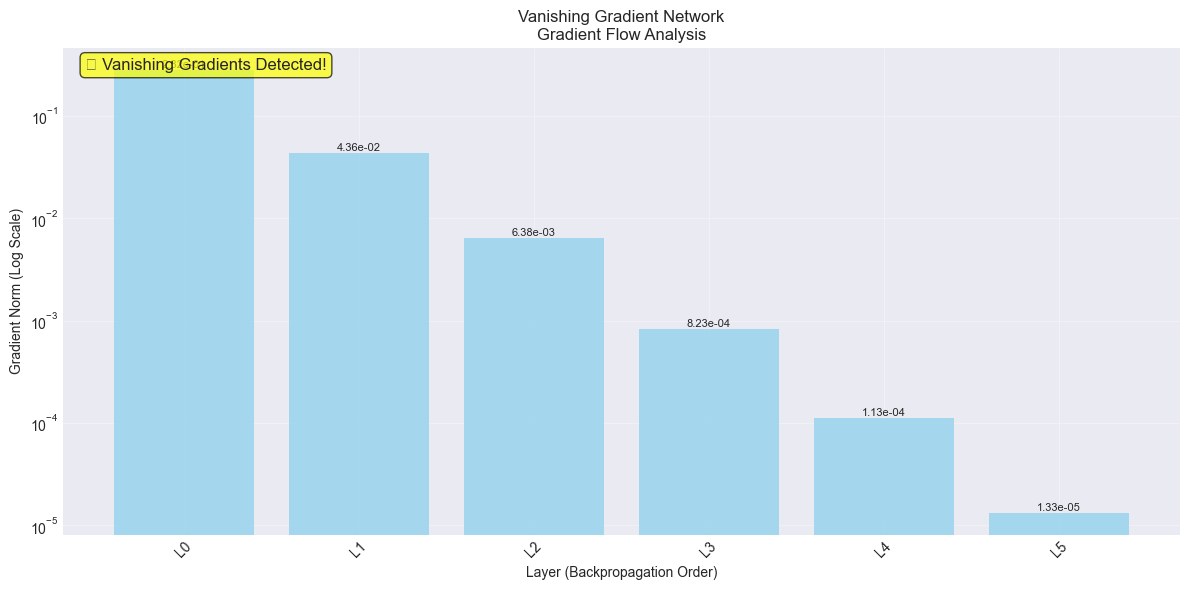


2. Testing Exploding Gradient Network (Poor Init)
Loss: 33984557875200.0000


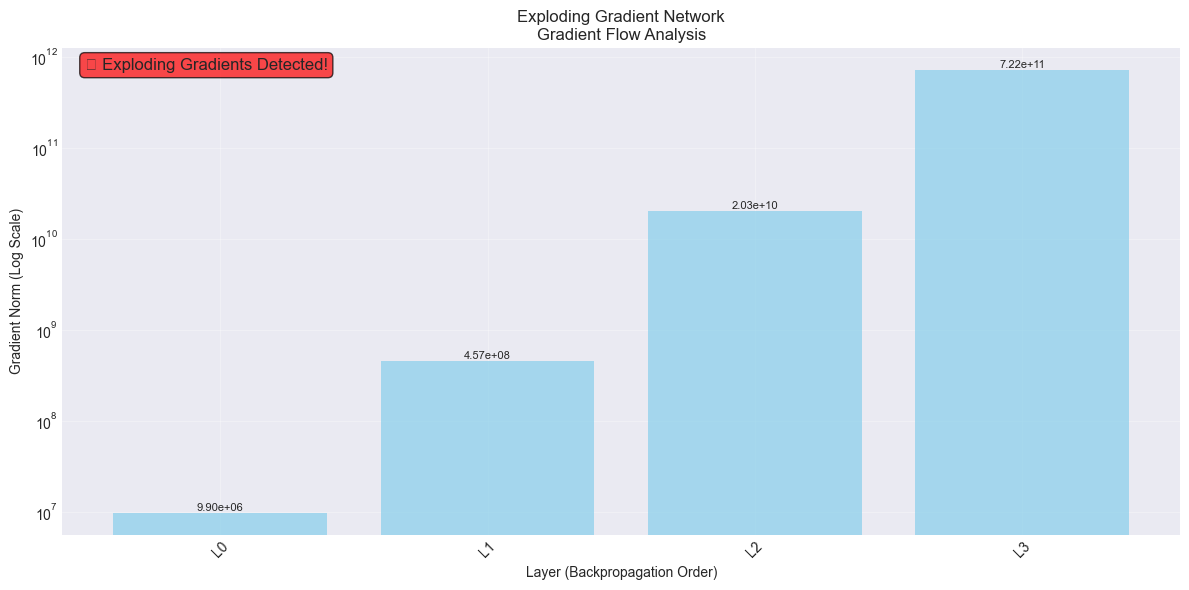


3. Testing Dying ReLU Network
Final Loss: 26.6377


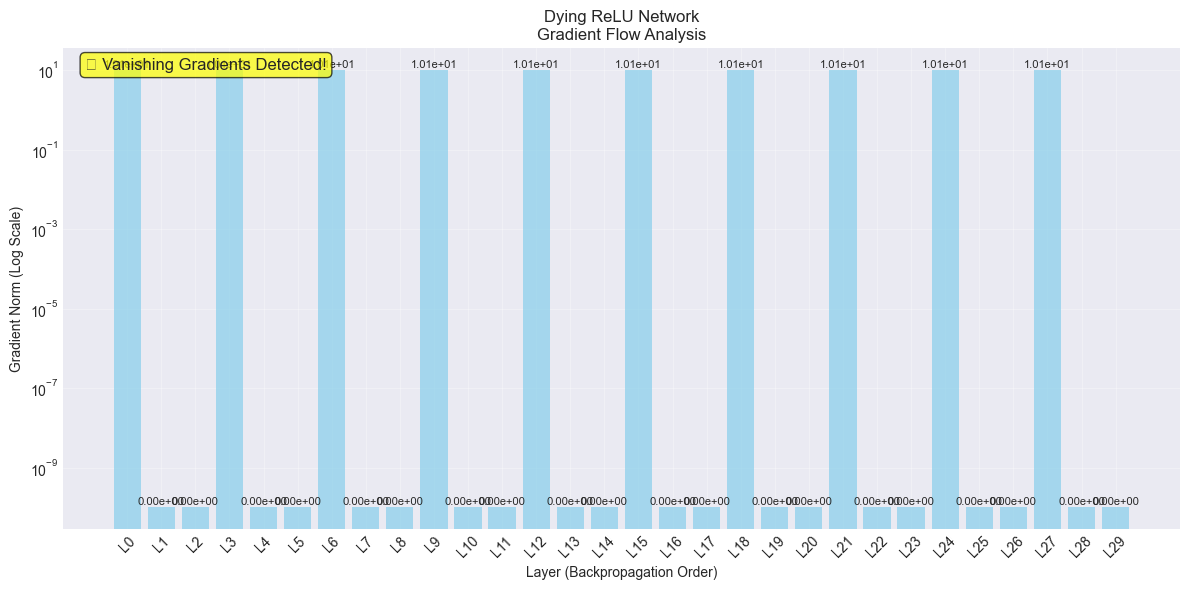

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data for testing
X_debug = torch.randn(100, 10)
y_debug = torch.randn(100, 1)

print("🔬 Diagnosing Problematic Networks\n")

def improved_visualize_gradient_flow(diagnostic, title):
    """Improved visualization that clearly shows gradient patterns"""
    if not diagnostic.gradient_history:
        print("No gradient data to visualize")
        return
    
    # Extract gradient norms and layer names
    gradient_norms = [item.get('grad_input_norm', 0) for item in diagnostic.gradient_history]
    layer_names = [item.get('layer', f'Layer {i}') for i in range(len(gradient_norms))]
    
    # Create the plot
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    
    # Use log scale for y-axis to handle wide range of values
    y_values = np.array(gradient_norms)
    y_values = np.maximum(y_values, 1e-10)  # Avoid log(0)
    
    x_positions = range(len(gradient_norms))
    bars = ax.bar(x_positions, y_values, color='skyblue', alpha=0.7)
    
    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, gradient_norms)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{value:.2e}', ha='center', va='bottom', fontsize=8)
    
    # Formatting
    ax.set_yscale('log')
    ax.set_xlabel('Layer (Backpropagation Order)')
    ax.set_ylabel('Gradient Norm (Log Scale)')
    ax.set_title(f'{title}\nGradient Flow Analysis')
    ax.set_xticks(x_positions)
    ax.set_xticklabels([f'L{i}' for i in range(len(gradient_norms))], rotation=45)
    ax.grid(True, alpha=0.3)
    
    # Add pattern analysis
    if len(gradient_norms) > 1:
        # Check for vanishing gradients (decreasing pattern)
        if gradient_norms[0] > gradient_norms[-1] * 100:
            ax.text(0.02, 0.98, '🔍 Vanishing Gradients Detected!', 
                   transform=ax.transAxes, fontsize=12, 
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
                   verticalalignment='top')
        
        # Check for exploding gradients (increasing pattern)
        elif gradient_norms[-1] > gradient_norms[0] * 100:
            ax.text(0.02, 0.98, '💥 Exploding Gradients Detected!', 
                   transform=ax.transAxes, fontsize=12, 
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="red", alpha=0.7),
                   verticalalignment='top')
        
        # Check for dying neurons (many zeros)
        elif sum(1 for g in gradient_norms if g < 1e-6) > len(gradient_norms) * 0.5:
            ax.text(0.02, 0.98, '💀 Dying Neurons Detected!', 
                   transform=ax.transAxes, fontsize=12, 
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="orange", alpha=0.7),
                   verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

# Test 1: Vanishing Gradients
print("1. Testing Vanishing Gradient Network (Deep Sigmoids)")
print("="*50)

vanishing_model = ProblematicNetworks.create_vanishing_gradient_network()
vanishing_diagnostic = GradientFlowDiagnostic(vanishing_model)
vanishing_diagnostic.register_hooks()

optimizer = optim.SGD(vanishing_model.parameters(), lr=1.0)
optimizer.zero_grad()

# Forward pass
output = vanishing_model(X_debug)
loss = nn.MSELoss()(output, y_debug)
print(f"Loss: {loss:.4f}")

# IMPORTANT: Backward pass to compute gradients
loss.backward()

# Use improved visualization
improved_visualize_gradient_flow(vanishing_diagnostic, "Vanishing Gradient Network")
vanishing_diagnostic.remove_hooks()

# Test 2: Exploding Gradients
print("\n2. Testing Exploding Gradient Network (Poor Init)")
print("="*50)

exploding_model = ProblematicNetworks.create_exploding_gradient_network()
exploding_diagnostic = GradientFlowDiagnostic(exploding_model)
exploding_diagnostic.register_hooks()

optimizer = optim.SGD(exploding_model.parameters(), lr=0.001)
optimizer.zero_grad()

try:
    # Forward pass
    output = exploding_model(X_debug)
    loss = nn.MSELoss()(output, y_debug)
    print(f"Loss: {loss:.4f}")
    
    # IMPORTANT: Backward pass
    loss.backward()
    
    # Use improved visualization
    improved_visualize_gradient_flow(exploding_diagnostic, "Exploding Gradient Network")
except Exception as e:
    print(f"💥 Network exploded! Error: {e}")

exploding_diagnostic.remove_hooks()

# Test 3: Dying ReLUs
print("\n3. Testing Dying ReLU Network")
print("="*50)

dying_model = ProblematicNetworks.create_dying_relu_network()
dying_diagnostic = GradientFlowDiagnostic(dying_model)
dying_diagnostic.register_hooks()

optimizer = optim.Adam(dying_model.parameters(), lr=0.001)

# Train for a few steps to see dying ReLUs
for i in range(10):
    optimizer.zero_grad()
    # Forward pass
    output = dying_model(X_debug)
    loss = nn.MSELoss()(output, y_debug)
    
    # IMPORTANT: Backward pass
    loss.backward()
    optimizer.step()

print(f"Final Loss: {loss:.4f}")

# Use improved visualization
improved_visualize_gradient_flow(dying_diagnostic, "Dying ReLU Network")
dying_diagnostic.remove_hooks()

In [59]:
# Check what's actually available in the diagnostic object
print("Available attributes and methods:")
print([attr for attr in dir(vanishing_diagnostic) if not attr.startswith('_')])

# Check the class structure
print(f"\nClass: {vanishing_diagnostic.__class__.__name__}")
print(f"Module: {vanishing_diagnostic.__class__.__module__}")

Available attributes and methods:
['activation_history', 'diagnose', 'gradient_history', 'handles', 'model', 'register_hooks', 'remove_hooks', 'visualize_gradient_flow']

Class: GradientFlowDiagnostic
Module: __main__


In [61]:
# Check the actual structure of gradient_history and activation_history
print("Type of gradient_history:", type(vanishing_diagnostic.gradient_history))
print("Length of gradient_history:", len(vanishing_diagnostic.gradient_history) if hasattr(vanishing_diagnostic.gradient_history, '__len__') else "No len()")
print("Type of activation_history:", type(vanishing_diagnostic.activation_history))
print("Length of activation_history:", len(vanishing_diagnostic.activation_history) if hasattr(vanishing_diagnostic.activation_history, '__len__') else "No len()")

# Check first few items in each list
if vanishing_diagnostic.gradient_history and len(vanishing_diagnostic.gradient_history) > 0:
    print("\nFirst few gradient history items:")
    for i, item in enumerate(vanishing_diagnostic.gradient_history[:3]):
        print(f"  Item {i}: {type(item)}, {item if hasattr(item, 'shape') else str(item)[:100]}")

if vanishing_diagnostic.activation_history and len(vanishing_diagnostic.activation_history) > 0:
    print("\nFirst few activation history items:")
    for i, item in enumerate(vanishing_diagnostic.activation_history[:3]):
        print(f"  Item {i}: {type(item)}, {item if hasattr(item, 'shape') else str(item)[:100]}")

# Check handles
print("\nHandles info:")
print("Type of handles:", type(vanishing_diagnostic.handles))
print("Number of handles:", len(vanishing_diagnostic.handles) if vanishing_diagnostic.handles else "0")

Type of gradient_history: <class 'list'>
Length of gradient_history: 6
Type of activation_history: <class 'list'>
Length of activation_history: 6

First few gradient history items:
  Item 0: <class 'dict'>, {'layer': 'Linear(in_features=50, out_features=1, bias=True)', 'grad_input_norm': 0.8794832229614258
  Item 1: <class 'dict'>, {'layer': 'Linear(in_features=50, out_features=50, bias=True)', 'grad_input_norm': 0.119376227259635
  Item 2: <class 'dict'>, {'layer': 'Linear(in_features=50, out_features=50, bias=True)', 'grad_input_norm': 0.013841676525771

First few activation history items:
  Item 0: <class 'dict'>, {'layer': 'Linear(in_features=10, out_features=50, bias=True)', 'input_mean': 0.009381866082549095, 
  Item 1: <class 'dict'>, {'layer': 'Linear(in_features=50, out_features=50, bias=True)', 'input_mean': 0.509736180305481, 'ou
  Item 2: <class 'dict'>, {'layer': 'Linear(in_features=50, out_features=50, bias=True)', 'input_mean': 0.49189257621765137, '

Handles info:
Type 

In [62]:
print("Vanishing Gradient Network - Gradient Norms by Layer:")
for i, item in enumerate(vanishing_diagnostic.gradient_history):
    layer_info = item.get('layer', 'Unknown')
    grad_norm = item.get('grad_input_norm', 0)
    print(f"  Layer {i}: {grad_norm:.6f} - {layer_info}")

print("\nExploding Gradient Network - Gradient Norms by Layer:")
for i, item in enumerate(exploding_diagnostic.gradient_history):
    layer_info = item.get('layer', 'Unknown')
    grad_norm = item.get('grad_input_norm', 0)
    print(f"  Layer {i}: {grad_norm:.6f} - {layer_info}")

print("\nDying ReLU Network - Gradient Norms by Layer:")
for i, item in enumerate(dying_diagnostic.gradient_history):
    layer_info = item.get('layer', 'Unknown')
    grad_norm = item.get('grad_input_norm', 0)
    print(f"  Layer {i}: {grad_norm:.6f} - {layer_info}")

Vanishing Gradient Network - Gradient Norms by Layer:
  Layer 0: 0.879483 - Linear(in_features=50, out_features=1, bias=True)
  Layer 1: 0.119376 - Linear(in_features=50, out_features=50, bias=True)
  Layer 2: 0.013842 - Linear(in_features=50, out_features=50, bias=True)
  Layer 3: 0.001749 - Linear(in_features=50, out_features=50, bias=True)
  Layer 4: 0.000249 - Linear(in_features=50, out_features=50, bias=True)
  Layer 5: 0.000032 - Linear(in_features=10, out_features=50, bias=True)

Exploding Gradient Network - Gradient Norms by Layer:
  Layer 0: 1386085.375000 - Linear(in_features=50, out_features=1, bias=True)
  Layer 1: 69996200.000000 - Linear(in_features=50, out_features=50, bias=True)
  Layer 2: 3014071552.000000 - Linear(in_features=50, out_features=50, bias=True)
  Layer 3: 127692275712.000000 - Linear(in_features=10, out_features=50, bias=True)

Dying ReLU Network - Gradient Norms by Layer:
  Layer 0: 9.941196 - Linear(in_features=50, out_features=1, bias=True)
  Layer 1: 

### Solutions and Best Practices

Now let's implement solutions to these common problems.

In [70]:
class OptimizationSolutions:
    """Best practices and solutions for common optimization problems"""
    
    @staticmethod
    def create_robust_network(input_size=None):
        """Network with best practices applied"""
        
        class RobustNet(nn.Module):
            def __init__(self, input_size=10, hidden_sizes=[64, 64, 32], output_size=1):
                super().__init__()
                
                # Auto-detect input size if not provided
                if input_size is None:
                    # We'll determine this from the first forward pass
                    self.input_size = None
                    self.layers = None
                    self.batch_norms = None
                    self.output = None
                    self.activation = None
                    self.dropout = None
                    self._initialized = False
                    self._hidden_sizes = hidden_sizes
                    self._output_size = output_size
                else:
                    self._build_network(input_size, hidden_sizes, output_size)
            
            def _build_network(self, input_size, hidden_sizes, output_size):
                """Build the actual network layers"""
                self.layers = nn.ModuleList()
                self.batch_norms = nn.ModuleList()
                
                # Build network with best practices
                prev_size = input_size
                for hidden_size in hidden_sizes:
                    # Linear layer
                    layer = nn.Linear(prev_size, hidden_size)
                    
                    # Proper initialization (Kaiming/He for ReLU)
                    nn.init.kaiming_normal_(layer.weight, mode='fan_out', 
                                          nonlinearity='relu')
                    nn.init.constant_(layer.bias, 0)
                    
                    self.layers.append(layer)
                    
                    # Batch normalization
                    self.batch_norms.append(nn.BatchNorm1d(hidden_size))
                    
                    prev_size = hidden_size
                
                # Output layer
                self.output = nn.Linear(prev_size, output_size)
                nn.init.kaiming_normal_(self.output.weight)
                nn.init.constant_(self.output.bias, 0)
                
                # Use LeakyReLU to avoid dying neurons
                self.activation = nn.LeakyReLU(0.1)
                
                # Dropout for regularization
                self.dropout = nn.Dropout(0.2)
                
                self._initialized = True
            
            def forward(self, x):
                # Initialize network on first forward pass if needed
                if not self._initialized:
                    input_size = x.shape[1]  # Get actual input size from data
                    self._build_network(input_size, self._hidden_sizes, self._output_size)
                
                for layer, bn in zip(self.layers, self.batch_norms):
                    x = layer(x)
                    x = bn(x)
                    x = self.activation(x)
                    x = self.dropout(x)
                
                x = self.output(x)
                return x
        
        # Create network with auto-detected input size
        return RobustNet(input_size)
    
    @staticmethod
    def train_with_best_practices(model, train_loader, test_loader, epochs=50):
        """Training loop with all best practices"""
        
        # Force initialization by running a dummy forward pass
        # This ensures all parameters exist before creating optimizer
        with torch.no_grad():
            # Get a small batch (at least 2 samples) for proper batch norm initialization
            dummy_batch = next(iter(train_loader))
            dummy_input = dummy_batch[0][:2]  # Get first 2 samples to ensure batch_size > 1
            _ = model(dummy_input)  # This initializes the network if needed
        
        # Now create optimizer with actual parameters
        optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
        
        # Learning rate scheduler (removed unsupported 'verbose' parameter)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, mode='min', factor=0.5, patience=5
        )
        
        # Loss function
        criterion = nn.MSELoss()
        
        # Gradient clipping value
        max_grad_norm = 1.0
        
        history = {'train_loss': [], 'val_loss': [], 'grad_norm': []}
        
        print("🚀 Training with Best Practices")
        print("   ✓ Proper initialization (Kaiming)")
        print("   ✓ Batch normalization")
        print("   ✓ LeakyReLU activation")
        print("   ✓ Dropout regularization")
        print("   ✓ AdamW optimizer")
        print("   ✓ Learning rate scheduling")
        print("   ✓ Gradient clipping")
        print("="*50)
        
        for epoch in range(epochs):
            # Training
            model.train()
            train_loss = 0
            grad_norms = []
            
            for batch_X, batch_y in train_loader:
                optimizer.zero_grad()
                
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                loss.backward()
                
                # Gradient clipping
                grad_norm = torch.nn.utils.clip_grad_norm_(
                    model.parameters(), max_grad_norm
                )
                grad_norms.append(grad_norm.item())
                
                optimizer.step()
                train_loss += loss.item()
            
            # Validation
            model.eval()
            val_loss = 0
            with torch.no_grad():
                for batch_X, batch_y in test_loader:
                    outputs = model(batch_X)
                    loss = criterion(outputs, batch_y)
                    val_loss += loss.item()
            
            # Calculate epoch metrics
            avg_train_loss = train_loss / len(train_loader)
            avg_val_loss = val_loss / len(test_loader)
            avg_grad_norm = np.mean(grad_norms)
            
            # Update learning rate based on validation loss
            scheduler.step(avg_val_loss)
            
            # Store history
            history['train_loss'].append(avg_train_loss)
            history['val_loss'].append(avg_val_loss)
            history['grad_norm'].append(avg_grad_norm)
            
            # Log to WandB (if available)
            try:
                wandb.log({
                    "best_practices_train_loss": avg_train_loss,
                    "best_practices_val_loss": avg_val_loss,
                    "best_practices_grad_norm": avg_grad_norm,
                    "best_practices_lr": optimizer.param_groups[0]['lr'],
                    "epoch": epoch
                })
            except:
                pass  # WandB not available, skip logging
            
            if epoch % 10 == 0:
                print(f"Epoch {epoch}: Train Loss = {avg_train_loss:.4f}, "
                      f"Val Loss = {avg_val_loss:.4f}, "
                      f"Grad Norm = {avg_grad_norm:.2f}")
        
        return history

# Create and train robust network (auto-detects input size)
robust_model = OptimizationSolutions.create_robust_network()

# Force initialization before training (with proper batch size)
print("🔧 Initializing robust network...")
with torch.no_grad():
    dummy_batch = next(iter(train_loader))
    dummy_input = dummy_batch[0][:2]  # Get first 2 samples to ensure batch_size > 1
    _ = robust_model(dummy_input)
    print(f"Network initialized with input size: {dummy_input.shape[1]}, batch size: {dummy_input.shape[0]}")

robust_history = OptimizationSolutions.train_with_best_practices(
    robust_model, train_loader, test_loader, epochs=50
)

🔧 Initializing robust network...
Network initialized with input size: 8, batch size: 2
🚀 Training with Best Practices
   ✓ Proper initialization (Kaiming)
   ✓ Batch normalization
   ✓ LeakyReLU activation
   ✓ Dropout regularization
   ✓ AdamW optimizer
   ✓ Learning rate scheduling
   ✓ Gradient clipping
Epoch 0: Train Loss = 6.6144, Val Loss = 3.7965, Grad Norm = 15.88
Epoch 10: Train Loss = 0.7497, Val Loss = 0.4589, Grad Norm = 3.37
Epoch 20: Train Loss = 0.5778, Val Loss = 0.3918, Grad Norm = 2.56
Epoch 30: Train Loss = 0.5220, Val Loss = 0.4560, Grad Norm = 2.29
Epoch 40: Train Loss = 0.5104, Val Loss = 0.5315, Grad Norm = 2.30


### Comparing Problematic vs Robust Networks

Let's visualize the difference between problematic networks and our robust implementation.

In [74]:
# Create a problematic network that adapts to your data
class ProblematicNetworkFixed(nn.Module):
    """Fixed version of problematic network that adapts to data dimensions"""
    
    def __init__(self, input_size=10):
        super().__init__()
        # Use the actual input size from your data
        self.network = nn.Sequential(
            nn.Linear(input_size, 50),
            nn.Sigmoid(),
            nn.Linear(50, 50),
            nn.Sigmoid(),
            nn.Linear(50, 50),
            nn.Sigmoid(),
            nn.Linear(50, 50),
            nn.Sigmoid(),
            nn.Linear(50, 50),
            nn.Sigmoid(),
            nn.Linear(50, 1)
        )
        
        # Poor initialization for vanishing gradients
        for layer in self.network:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
                nn.init.constant_(layer.bias, 0)
    
    def forward(self, x):
        return self.network(x)

# Get the actual input size from your data
actual_input_size = next(iter(train_loader))[0].shape[1]
print(f"🔧 Creating networks with actual input size: {actual_input_size}")

# Create problematic network with correct input size
problematic_model = ProblematicNetworkFixed(input_size=actual_input_size)
problematic_optimizer = optim.SGD(problematic_model.parameters(), lr=1.0)
problematic_criterion = nn.MSELoss()

# Train problematic network for comparison
print("\n🔄 Training problematic network for comparison...")
problematic_losses = []

for epoch in range(20):  # Train for fewer epochs to see the difference
    for batch_X, batch_y in train_loader:
        problematic_optimizer.zero_grad()
        outputs = problematic_model(batch_X)  # No need to slice now
        loss = problematic_criterion(outputs, batch_y)
        loss.backward()
        problematic_optimizer.step()
        problematic_losses.append(loss.item())
    
    if epoch % 5 == 0:
        print(f"Problematic Network Epoch {epoch}: Loss = {loss.item():.4f}")

print("✅ Problematic network training completed!")

🔧 Creating networks with actual input size: 8

🔄 Training problematic network for comparison...
Problematic Network Epoch 0: Loss = 37913928.0000
Problematic Network Epoch 5: Loss = 37972360.0000
Problematic Network Epoch 10: Loss = 38048692.0000
Problematic Network Epoch 15: Loss = 37952196.0000
✅ Problematic network training completed!


### Interactive Debugging Dashboard

Let's create an interactive dashboard for real-time debugging during training.

In [75]:
@interact(
    problem_type=widgets.Dropdown(
        options=['Vanishing Gradients', 'Exploding Gradients', 
                'Learning Rate Issues', 'Dying ReLUs'],
        value='Vanishing Gradients',
        description='Problem:',
        style={'description_width': 'initial'}
    ),
    show_solution=widgets.Checkbox(value=True, description='Show Solution')
)
def debugging_dashboard(problem_type, show_solution):
    """Interactive debugging guide for common problems"""
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Problem visualization
    epochs = np.arange(50)
    
    if problem_type == 'Vanishing Gradients':
        # Simulate vanishing gradient behavior
        loss_problematic = 2.0 - 0.01 * np.log(epochs + 1)
        grad_norm_problematic = 1e-5 * np.exp(-epochs / 10)
        
        if show_solution:
            loss_fixed = 2.0 * np.exp(-epochs / 10)
            grad_norm_fixed = 0.1 * np.exp(-epochs / 20)
        
        symptoms = [
            "Very slow or no learning",
            "Gradient norms < 1e-6",
            "Loss plateaus early",
            "Deep sigmoid/tanh networks"
        ]
        
        solutions = [
            "Use ReLU/LeakyReLU activations",
            "Add batch normalization",
            "Use residual connections",
            "Better initialization (Xavier/Kaiming)"
        ]
        
    elif problem_type == 'Exploding Gradients':
        # Simulate exploding gradient behavior
        loss_problematic = np.where(epochs < 10, 
                                   2.0 + 0.5 * epochs, 
                                   np.inf)
        grad_norm_problematic = np.exp(epochs / 5)
        
        if show_solution:
            loss_fixed = 2.0 * np.exp(-epochs / 15)
            grad_norm_fixed = np.clip(0.5 + 0.1 * np.random.randn(50), 0.1, 1.0)
        
        symptoms = [
            "Loss becomes NaN/Inf",
            "Gradient norms > 100",
            "Parameters blow up",
            "Training crashes"
        ]
        
        solutions = [
            "Gradient clipping (max_norm=1.0)",
            "Reduce learning rate",
            "Better initialization",
            "Check for numerical instability"
        ]
        
    elif problem_type == 'Learning Rate Issues':
        # Simulate learning rate problems
        loss_problematic = 2.0 + 0.5 * np.sin(epochs)
        grad_norm_problematic = 0.5 + 0.3 * np.sin(epochs * 2)
        
        if show_solution:
            loss_fixed = 2.0 * np.exp(-epochs / 15)
            grad_norm_fixed = 0.1 * np.exp(-epochs / 30)
        
        symptoms = [
            "Oscillating loss",
            "Very slow convergence",
            "Divergence",
            "Unstable training"
        ]
        
        solutions = [
            "Use learning rate scheduling",
            "Try adaptive optimizers (Adam)",
            "Grid search for optimal LR",
            "Warm-up period for large models"
        ]
        
    else:  # Dying ReLUs
        # Simulate dying ReLU behavior
        loss_problematic = 2.0 - 0.5 * np.sqrt(epochs)
        grad_norm_problematic = 0.1 * (1 - epochs / 100)
        
        if show_solution:
            loss_fixed = 2.0 * np.exp(-epochs / 12)
            grad_norm_fixed = 0.2 * np.exp(-epochs / 25)
        
        symptoms = [
            "Many neurons output zero",
            "Gradients become sparse",
            "Performance plateaus",
            "Loss of model capacity"
        ]
        
        solutions = [
            "Use LeakyReLU or ELU",
            "Careful bias initialization",
            "Lower learning rate",
            "Batch normalization"
        ]
    
    # Plot problematic behavior
    ax1.plot(epochs, loss_problematic, 'r-', linewidth=3, 
            label='Problematic', alpha=0.8)
    if show_solution:
        ax1.plot(epochs, loss_fixed, 'g-', linewidth=3, 
                label='Fixed', alpha=0.8)
    
    style_plot(ax1, f'{problem_type}: Loss Curve', 'Epoch', 'Loss')
    ax1.legend()
    
    # Plot gradient norms
    ax2.semilogy(epochs, np.clip(grad_norm_problematic, 1e-10, 1e10), 
                'r-', linewidth=3, label='Problematic', alpha=0.8)
    if show_solution:
        ax2.semilogy(epochs, grad_norm_fixed, 'g-', linewidth=3, 
                    label='Fixed', alpha=0.8)
    
    style_plot(ax2, 'Gradient Norm', 'Epoch', '||∇|| (log scale)')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Display diagnostic information
    print(f"🔍 Diagnosing: {problem_type}")
    print("\n⚠️ Common Symptoms:")
    for symptom in symptoms:
        print(f"   • {symptom}")
    
    if show_solution:
        print("\n✅ Recommended Solutions:")
        for solution in solutions:
            print(f"   • {solution}")
        
        print("\n💡 Pro Tip: Always monitor gradient norms during training!")

interactive(children=(Dropdown(description='Problem:', options=('Vanishing Gradients', 'Exploding Gradients', …

## Conclusion: Mastering Optimization in Machine Learning

We've completed our journey through the landscape of optimization, from manual line fitting to training robust neural networks. Let's summarize what we've learned and look toward the future.


### Key Takeaways

Our exploration has revealed eight fundamental insights about optimization in machine learning:

1. **Intuition First**: Understanding gradient descent starts with visualizing the optimization landscape. The loss surface tells us everything about the difficulty of our problem.

2. **Implementation Matters**: Building optimizers from scratch reveals crucial details. Every line of code represents a design decision that impacts performance.

3. **Batch Size Trade-offs**: 
   - Full batch → Accurate gradients but slow
   - SGD → Fast but noisy
   - Mini-batch → The sweet spot for most problems

4. **Advanced Optimizers Are Essential**: Adam isn't always best, but understanding when to use momentum, RMSprop, or plain SGD is a superpower.

5. **Learning Rate is Critical**: Too high and you diverge, too low and you never arrive. Scheduling helps navigate this challenge.

6. **Neural Networks Amplify Everything**: Deeper networks need more careful optimization. Every trick matters at scale.

7. **Debugging is a Skill**: Monitor gradients, visualize training, and understand failure modes. Problems are predictable and solvable.

8. **Experiment Tracking is Professional**: Tools like WandB transform ML from art to science. Track everything, understand patterns.


### The Modern Optimization Toolkit

Here's your professional optimization toolkit based on our journey:
# Your Optimization Checklist

## For Small Projects / Prototyping:
- Optimizer: Adam with default settings
- Learning rate: 1e-3 for Adam, 1e-2 for SGD
- Batch size: 32-64
- No scheduling needed

## For Serious Training:
- Optimizer: AdamW (includes weight decay)
- Learning rate: Start with 1e-3, tune carefully
- Batch size: As large as GPU allows
- Scheduler: Cosine annealing or ReduceLROnPlateau
- Gradient clipping: max_norm=1.0

## For Research / State-of-the-art:
- Optimizer: AdamW or LAMB for very large batch
- Learning rate: Linear warm-up + cosine decay
- Batch size: Distributed training enables 1000+
- Mixed precision training (fp16)
- Gradient accumulation for memory efficiency

## Always:
✓ Monitor gradient norms
✓ Track training and validation metrics
✓ Use proper initialization
✓ Implement early stopping
✓ Save checkpoints regularly

### Connection to Modern AI

The optimization techniques we've learned are the foundation of modern AI breakthroughs:


**Large Language Models (GPT, Claude)**
- Billions of parameters optimized with specialized variants of Adam
- Learning rate scheduling is crucial at scale
- Gradient accumulation enables massive effective batch sizes

**Computer Vision (Vision Transformers)**
- Complex optimization schedules with warm-up
- Layer-wise learning rates
- Advanced augmentation requires robust optimization


**Scientific ML**
- Physics-informed neural networks need specialized optimizers
- Multi-objective optimization balances data and physics losses
- Second-order methods becoming practical

**Future Directions**
- Adaptive optimizers that adjust to problem geometry
- Learned optimizers (using ML to optimize ML)
- Quantum-inspired optimization algorithms

### Your Next Steps

Based on mastering these optimization concepts, here are recommended next steps:

1. **Immediate Practice**
   - Implement a custom optimizer (e.g., AdaGrad)
   - Debug a failing neural network training
   - Create your own learning rate scheduler

2. **Deeper Understanding**
   - Study second-order methods (L-BFGS, Newton's method)
   - Explore natural gradient descent
   - Learn about optimization on manifolds

3. **Advanced Topics**
   - Distributed optimization for large-scale training
   - Meta-learning and learned optimization
   - Optimization for GANs and reinforcement learning

4. **Real-World Application**
   - Apply these techniques to your own problems
   - Contribute to open-source optimization libraries
   - Share your debugging experiences with the community

### Final Thoughts

Optimization is where theory meets practice in machine learning. Every model you train, from simple linear regression to massive transformers, relies on these fundamental concepts.

Remember:
- **Start simple**: Get basic gradient descent working first
- **Visualize everything**: You can't optimize what you can't see
- **Experiment systematically**: Change one thing at a time
- **Learn from failures**: Every NaN teaches you something
- **Stay curious**: New optimizers are invented regularly

The journey from manually adjusting lines to training neural networks mirrors the evolution of machine learning itself. You now have the knowledge to not just use these tools, but to understand, debug, and improve them.

> "In machine learning, optimization is not just about finding the minimum - it's about finding it efficiently, reliably, and understanding the journey along the way."


### Resources for Continued Learning

**Essential Papers**
- "Adam: A Method for Stochastic Optimization" (Kingma & Ba, 2014)
- "On the importance of initialization and momentum" (Sutskever et al., 2013)
- "Decoupled Weight Decay Regularization" (Loshchilov & Hutter, 2017)

**Online Courses**
- Fast.ai Practical Deep Learning: https://course.fast.ai/
- Stanford CS231n (Optimization Lecture): http://cs231n.stanford.edu/
- Deep Learning Specialization (Coursera): Focus on Course 2

**Books**
- "Deep Learning" by Goodfellow, Bengio, and Courville (Chapter 8)
- "Pattern Recognition and Machine Learning" by Bishop
- "Convex Optimization" by Boyd and Vandenberghe

**Tools and Libraries**
- PyTorch Optimizers: https://pytorch.org/docs/stable/optim.html
- Weights & Biases: https://wandb.ai/
- Optuna (Hyperparameter Optimization): https://optuna.org/

**Community**
- r/MachineLearning on Reddit
- Papers with Code: https://paperswithcode.com/
- Distill.pub for visual explanations


## Thank You!

Thank you for joining this journey through gradient descent and optimization. You're now equipped with both theoretical understanding and practical skills to tackle real-world machine learning problems.

Remember: Every expert was once a beginner who refused to give up when the loss exploded.

**Happy Optimizing! 🚀**

---

*This notebook was designed for education and practical application. Share it, modify it, and most importantly - use it to build something amazing.*


In [76]:
# Final cleanup
if USE_WANDB:
    wandb.finish()
    print("✅ WandB run finished successfully!")
else:
    print("✅ Notebook completed!")

✅ Notebook completed!


## Notebook Metadata Configuration

For proper RISE presentation setup, ensure your notebook metadata includes:

```json
{
  "celltoolbar": "Slideshow",
  "kernelspec": {
    "name": "python3",
    "display_name": "Python 3 (ipykernel)",
    "language": "python"
  },
  "language_info": {
    "name": "python",
    "version": "3.11.5",
    "mimetype": "text/x-python",
    "codemirror_mode": {
      "name": "ipython",
      "version": 3
    },
    "pygments_lexer": "ipython3",
    "nbconvert_exporter": "python",
    "file_extension": ".py"
  },
  "rise": {
    "theme": "white",
    "transition": "fade",
    "start_slideshow_at": "beginning",
    "header": "<h3>Gradient Descent and Optimization</h3>",
    "footer": "<h3>Machine Learning Course</h3>",
    "scroll": true,
    "enable_chalkboard": true,
    "slideNumber": "c/t",
    "showSlideNumber": "all",
    "keyboard": {
      "37": "prev",
      "39": "next"
    }
  }
}
```